## Importing liblaries

In [1]:
import tensorflow as tf
import cv2
import numpy as np 
from matplotlib import pyplot as plt 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.layers import Dense, MaxPool2D,Conv2D
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input,Activation,Add 
from tensorflow.keras.regularizers import l2 
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop


D:\python\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fldr="./UTKFace"

In [3]:
import os
flies=os.listdir(fldr)

## Create list of images from dataset

In [4]:
ages=[]
genders=[]
images=[]

for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

./UTKFace/11_0_0_20170110225327724.jpg.chip.jpg
./UTKFace/11_0_0_20170110225435539.jpg.chip.jpg
./UTKFace/11_0_0_20170110225459361.jpg.chip.jpg
./UTKFace/11_0_0_20170110232511893.jpg.chip.jpg
./UTKFace/11_0_1_20170103201136230.jpg.chip.jpg
./UTKFace/11_0_2_20170103200847287.jpg.chip.jpg
./UTKFace/11_0_3_20170104013250186.jpg.chip.jpg
./UTKFace/11_0_3_20170104230222352.jpg.chip.jpg
./UTKFace/11_0_4_20170103200621488.jpg.chip.jpg
./UTKFace/11_1_0_20170103200517422.jpg.chip.jpg
./UTKFace/11_1_0_20170109203319557.jpg.chip.jpg
./UTKFace/11_1_0_20170109203327397.jpg.chip.jpg
./UTKFace/11_1_0_20170109203353740.jpg.chip.jpg
./UTKFace/11_1_0_20170109203400684.jpg.chip.jpg
./UTKFace/11_1_0_20170109203422194.jpg.chip.jpg
./UTKFace/11_1_0_20170109203919852.jpg.chip.jpg
./UTKFace/11_1_0_20170109204030951.jpg.chip.jpg
./UTKFace/11_1_0_20170109204123358.jpg.chip.jpg
./UTKFace/11_1_0_20170109204523092.jpg.chip.jpg
./UTKFace/11_1_0_20170109204546617.jpg.chip.jpg
./UTKFace/11_1_0_20170109204611305.jpg.c

./UTKFace/13_0_0_20170110225045970.jpg.chip.jpg
./UTKFace/13_0_0_20170110225059227.jpg.chip.jpg
./UTKFace/13_0_0_20170110225302179.jpg.chip.jpg
./UTKFace/13_0_0_20170110225307195.jpg.chip.jpg
./UTKFace/13_0_0_20170110225428740.jpg.chip.jpg
./UTKFace/13_0_0_20170110225438328.jpg.chip.jpg
./UTKFace/13_0_0_20170110225447389.jpg.chip.jpg
./UTKFace/13_0_0_20170110225513115.jpg.chip.jpg
./UTKFace/13_0_0_20170110225717809.jpg.chip.jpg
./UTKFace/13_0_0_20170110232519225.jpg.chip.jpg
./UTKFace/13_0_0_20170110232526929.jpg.chip.jpg
./UTKFace/13_0_1_20170110232537879.jpg.chip.jpg
./UTKFace/13_0_1_20170113150907477.jpg.chip.jpg
./UTKFace/13_0_2_20170103201143159.jpg.chip.jpg
./UTKFace/13_0_2_20170103201417686.jpg.chip.jpg
./UTKFace/13_0_2_20170117152653604.jpg.chip.jpg
./UTKFace/13_0_3_20170110232628896.jpg.chip.jpg
./UTKFace/13_0_3_20170119153840721.jpg.chip.jpg
./UTKFace/13_0_4_20170103201708406.jpg.chip.jpg
./UTKFace/13_1_0_20170104005742384.jpg.chip.jpg
./UTKFace/13_1_0_20170109201102915.jpg.c

./UTKFace/15_0_0_20170110225705232.jpg.chip.jpg
./UTKFace/15_0_0_20170110231550866.jpg.chip.jpg
./UTKFace/15_0_0_20170110232117349.jpg.chip.jpg
./UTKFace/15_0_0_20170110232306381.jpg.chip.jpg
./UTKFace/15_0_0_20170110232311158.jpg.chip.jpg
./UTKFace/15_0_0_20170110232322390.jpg.chip.jpg
./UTKFace/15_0_0_20170110232327328.jpg.chip.jpg
./UTKFace/15_0_0_20170110232331351.jpg.chip.jpg
./UTKFace/15_0_0_20170110232338801.jpg.chip.jpg
./UTKFace/15_0_0_20170110232443234.jpg.chip.jpg
./UTKFace/15_0_0_20170110232452356.jpg.chip.jpg
./UTKFace/15_0_0_20170110232515682.jpg.chip.jpg
./UTKFace/15_0_0_20170110232532949.jpg.chip.jpg
./UTKFace/15_0_0_20170110232610061.jpg.chip.jpg
./UTKFace/15_0_0_20170110232636744.jpg.chip.jpg
./UTKFace/15_0_0_20170110232640357.jpg.chip.jpg
./UTKFace/15_0_0_20170110232646170.jpg.chip.jpg
./UTKFace/15_0_0_20170110232655904.jpg.chip.jpg
./UTKFace/15_0_0_20170110232717464.jpg.chip.jpg
./UTKFace/15_0_0_20170110232721987.jpg.chip.jpg
./UTKFace/15_0_0_20170110232730918.jpg.c

./UTKFace/16_0_0_20170110231720674.jpg.chip.jpg
./UTKFace/16_0_0_20170110231725022.jpg.chip.jpg
./UTKFace/16_0_0_20170110231726179.jpg.chip.jpg
./UTKFace/16_0_0_20170110231732210.jpg.chip.jpg
./UTKFace/16_0_0_20170110231736665.jpg.chip.jpg
./UTKFace/16_0_0_20170110231756634.jpg.chip.jpg
./UTKFace/16_0_0_20170110231758466.jpg.chip.jpg
./UTKFace/16_0_0_20170110231759619.jpg.chip.jpg
./UTKFace/16_0_0_20170110231801615.jpg.chip.jpg
./UTKFace/16_0_0_20170110231810810.jpg.chip.jpg
./UTKFace/16_0_0_20170110231811882.jpg.chip.jpg
./UTKFace/16_0_0_20170110231814139.jpg.chip.jpg
./UTKFace/16_0_0_20170110231815815.jpg.chip.jpg
./UTKFace/16_0_0_20170110231841292.jpg.chip.jpg
./UTKFace/16_0_0_20170110231904662.jpg.chip.jpg
./UTKFace/16_0_0_20170110231909175.jpg.chip.jpg
./UTKFace/16_0_0_20170110231910518.jpg.chip.jpg
./UTKFace/16_0_0_20170110231914222.jpg.chip.jpg
./UTKFace/16_0_0_20170110231916206.jpg.chip.jpg
./UTKFace/16_0_0_20170110231917206.jpg.chip.jpg
./UTKFace/16_0_0_20170110231918993.jpg.c

./UTKFace/17_0_1_20170114025858837.jpg.chip.jpg
./UTKFace/17_0_1_20170116182122450.jpg.chip.jpg
./UTKFace/17_0_1_20170116182454836.jpg.chip.jpg
./UTKFace/17_0_1_20170116205315177.jpg.chip.jpg
./UTKFace/17_0_1_20170116205618568.jpg.chip.jpg
./UTKFace/17_0_1_20170117103419741.jpg.chip.jpg
./UTKFace/17_0_1_20170117170512970.jpg.chip.jpg
./UTKFace/17_0_1_20170117183520064.jpg.chip.jpg
./UTKFace/17_0_2_20170105183230223.jpg.chip.jpg
./UTKFace/17_0_2_20170105183335071.jpg.chip.jpg
./UTKFace/17_0_3_20161219224759672.jpg.chip.jpg
./UTKFace/17_0_3_20170104225543888.jpg.chip.jpg
./UTKFace/17_0_3_20170104225710543.jpg.chip.jpg
./UTKFace/17_0_3_20170104225734512.jpg.chip.jpg
./UTKFace/17_0_3_20170104225736449.jpg.chip.jpg
./UTKFace/17_0_3_20170104230447112.jpg.chip.jpg
./UTKFace/17_0_3_20170117134709342.jpg.chip.jpg
./UTKFace/17_0_3_20170117152534037.jpg.chip.jpg
./UTKFace/17_0_4_20170102234904707.jpg.chip.jpg
./UTKFace/17_0_4_20170103201055366.jpg.chip.jpg
./UTKFace/17_0_4_20170103201116511.jpg.c

./UTKFace/18_1_0_20170109213931089.jpg.chip.jpg
./UTKFace/18_1_0_20170109213933756.jpg.chip.jpg
./UTKFace/18_1_0_20170109213935367.jpg.chip.jpg
./UTKFace/18_1_0_20170109213938695.jpg.chip.jpg
./UTKFace/18_1_0_20170109213945602.jpg.chip.jpg
./UTKFace/18_1_0_20170109214004496.jpg.chip.jpg
./UTKFace/18_1_0_20170109214042490.jpg.chip.jpg
./UTKFace/18_1_0_20170109214044181.jpg.chip.jpg
./UTKFace/18_1_0_20170109214106546.jpg.chip.jpg
./UTKFace/18_1_0_20170109214113667.jpg.chip.jpg
./UTKFace/18_1_0_20170109214116215.jpg.chip.jpg
./UTKFace/18_1_0_20170109214120554.jpg.chip.jpg
./UTKFace/18_1_0_20170109214122492.jpg.chip.jpg
./UTKFace/18_1_0_20170109214156684.jpg.chip.jpg
./UTKFace/18_1_0_20170109214215051.jpg.chip.jpg
./UTKFace/18_1_0_20170109214216731.jpg.chip.jpg
./UTKFace/18_1_0_20170109214239711.jpg.chip.jpg
./UTKFace/18_1_0_20170109214241069.jpg.chip.jpg
./UTKFace/18_1_0_20170109214248716.jpg.chip.jpg
./UTKFace/18_1_0_20170109214251980.jpg.chip.jpg
./UTKFace/18_1_0_20170109214254732.jpg.c

./UTKFace/19_1_0_20170105183441000.jpg.chip.jpg
./UTKFace/19_1_0_20170105184107718.jpg.chip.jpg
./UTKFace/19_1_0_20170109193136416.jpg.chip.jpg
./UTKFace/19_1_0_20170109205400352.jpg.chip.jpg
./UTKFace/19_1_0_20170109212458403.jpg.chip.jpg
./UTKFace/19_1_0_20170109212903959.jpg.chip.jpg
./UTKFace/19_1_0_20170109213113295.jpg.chip.jpg
./UTKFace/19_1_0_20170109213228173.jpg.chip.jpg
./UTKFace/19_1_0_20170109213247084.jpg.chip.jpg
./UTKFace/19_1_0_20170109214615122.jpg.chip.jpg
./UTKFace/19_1_0_20170112231655238.jpg.chip.jpg
./UTKFace/19_1_0_20170116163837603.jpg.chip.jpg
./UTKFace/19_1_0_20170116201120465.jpg.chip.jpg
./UTKFace/19_1_0_20170116205908124.jpg.chip.jpg
./UTKFace/19_1_0_20170116212113630.jpg.chip.jpg
./UTKFace/19_1_0_20170117140530071.jpg.chip.jpg
./UTKFace/19_1_0_20170119145731470.jpg.chip.jpg
./UTKFace/19_1_1_20170112191242381.jpg.chip.jpg
./UTKFace/19_1_1_20170112231417629.jpg.chip.jpg
./UTKFace/19_1_1_20170113012937783.jpg.chip.jpg
./UTKFace/19_1_1_20170114030819891.jpg.c

./UTKFace/1_0_0_20170117133107123.jpg.chip.jpg
./UTKFace/1_0_0_20170117133107124.jpg.chip.jpg
./UTKFace/1_0_1_20161219160115237.jpg.chip.jpg
./UTKFace/1_0_1_20170110212837862.jpg.chip.jpg
./UTKFace/1_0_1_20170110213111809.jpg.chip.jpg
./UTKFace/1_0_1_20170110213113882.jpg.chip.jpg
./UTKFace/1_0_1_20170110213645409.jpg.chip.jpg
./UTKFace/1_0_1_20170110213647161.jpg.chip.jpg
./UTKFace/1_0_1_20170110213649083.jpg.chip.jpg
./UTKFace/1_0_1_20170110213656556.jpg.chip.jpg
./UTKFace/1_0_1_20170110213700642.jpg.chip.jpg
./UTKFace/1_0_1_20170110213701704.jpg.chip.jpg
./UTKFace/1_0_1_20170110213707879.jpg.chip.jpg
./UTKFace/1_0_1_20170110213808936.jpg.chip.jpg
./UTKFace/1_0_1_20170110213810856.jpg.chip.jpg
./UTKFace/1_0_1_20170112211228948.jpg.chip.jpg
./UTKFace/1_0_1_20170117130048013.jpg.chip.jpg
./UTKFace/1_0_2_20161219140525218.jpg.chip.jpg
./UTKFace/1_0_2_20161219140530307.jpg.chip.jpg
./UTKFace/1_0_2_20161219140540938.jpg.chip.jpg
./UTKFace/1_0_2_20161219140744200.jpg.chip.jpg
./UTKFace/1_0

./UTKFace/1_0_2_20161219205827749.jpg.chip.jpg
./UTKFace/1_0_2_20161219205836181.jpg.chip.jpg
./UTKFace/1_0_2_20161219210310309.jpg.chip.jpg
./UTKFace/1_0_2_20161219210754437.jpg.chip.jpg
./UTKFace/1_0_2_20161219211107805.jpg.chip.jpg
./UTKFace/1_0_2_20161219211231133.jpg.chip.jpg
./UTKFace/1_0_2_20161219211244365.jpg.chip.jpg
./UTKFace/1_0_2_20161219211357821.jpg.chip.jpg
./UTKFace/1_0_2_20161219211407518.jpg.chip.jpg
./UTKFace/1_0_2_20161219211505437.jpg.chip.jpg
./UTKFace/1_0_2_20161219211706614.jpg.chip.jpg
./UTKFace/1_0_2_20161219211707638.jpg.chip.jpg
./UTKFace/1_0_2_20161219211823957.jpg.chip.jpg
./UTKFace/1_0_2_20161219211828974.jpg.chip.jpg
./UTKFace/1_0_2_20161219211836743.jpg.chip.jpg
./UTKFace/1_0_2_20161219212444782.jpg.chip.jpg
./UTKFace/1_0_2_20161219212502046.jpg.chip.jpg
./UTKFace/1_0_2_20161219212510086.jpg.chip.jpg
./UTKFace/1_0_2_20161219212516942.jpg.chip.jpg
./UTKFace/1_0_2_20161219212535950.jpg.chip.jpg
./UTKFace/1_0_2_20161219212555694.jpg.chip.jpg
./UTKFace/1_0

./UTKFace/1_0_4_20161221201411850.jpg.chip.jpg
./UTKFace/1_0_4_20161221201454961.jpg.chip.jpg
./UTKFace/1_0_4_20161221201458610.jpg.chip.jpg
./UTKFace/1_0_4_20161221201548713.jpg.chip.jpg
./UTKFace/1_0_4_20161221201753176.jpg.chip.jpg
./UTKFace/1_0_4_20161221201833209.jpg.chip.jpg
./UTKFace/1_0_4_20161221201909505.jpg.chip.jpg
./UTKFace/1_0_4_20161221202006449.jpg.chip.jpg
./UTKFace/1_0_4_20161221202008129.jpg.chip.jpg
./UTKFace/1_0_4_20161221202127697.jpg.chip.jpg
./UTKFace/1_0_4_20161221202132305.jpg.chip.jpg
./UTKFace/1_0_4_20161221202206568.jpg.chip.jpg
./UTKFace/1_0_4_20161221202305778.jpg.chip.jpg
./UTKFace/1_0_4_20161221202331737.jpg.chip.jpg
./UTKFace/1_0_4_20161221202458409.jpg.chip.jpg
./UTKFace/1_0_4_20161221202558993.jpg.chip.jpg
./UTKFace/1_0_4_20161221202601354.jpg.chip.jpg
./UTKFace/1_0_4_20161221202654538.jpg.chip.jpg
./UTKFace/1_0_4_20161221202848809.jpg.chip.jpg
./UTKFace/1_0_4_20161221203008320.jpg.chip.jpg
./UTKFace/1_0_4_20170103202326832.jpg.chip.jpg
./UTKFace/1_0

./UTKFace/1_1_2_20161219195107011.jpg.chip.jpg
./UTKFace/1_1_2_20161219195213195.jpg.chip.jpg
./UTKFace/1_1_2_20161219195252187.jpg.chip.jpg
./UTKFace/1_1_2_20161219195318220.jpg.chip.jpg
./UTKFace/1_1_2_20161219195630371.jpg.chip.jpg
./UTKFace/1_1_2_20161219195732971.jpg.chip.jpg
./UTKFace/1_1_2_20161219195916355.jpg.chip.jpg
./UTKFace/1_1_2_20161219195923075.jpg.chip.jpg
./UTKFace/1_1_2_20161219195928428.jpg.chip.jpg
./UTKFace/1_1_2_20161219200100707.jpg.chip.jpg
./UTKFace/1_1_2_20161219200119571.jpg.chip.jpg
./UTKFace/1_1_2_20161219200152877.jpg.chip.jpg
./UTKFace/1_1_2_20161219200230867.jpg.chip.jpg
./UTKFace/1_1_2_20161219200258716.jpg.chip.jpg
./UTKFace/1_1_2_20161219200309555.jpg.chip.jpg
./UTKFace/1_1_2_20161219200451724.jpg.chip.jpg
./UTKFace/1_1_2_20161219200456451.jpg.chip.jpg
./UTKFace/1_1_2_20161219200539420.jpg.chip.jpg
./UTKFace/1_1_2_20161219201159932.jpg.chip.jpg
./UTKFace/1_1_2_20161219201453804.jpg.chip.jpg
./UTKFace/1_1_2_20161219202106997.jpg.chip.jpg
./UTKFace/1_1

./UTKFace/1_1_4_20161221201846817.jpg.chip.jpg
./UTKFace/1_1_4_20161221201852145.jpg.chip.jpg
./UTKFace/1_1_4_20161221201921929.jpg.chip.jpg
./UTKFace/1_1_4_20161221201923657.jpg.chip.jpg
./UTKFace/1_1_4_20161221201957481.jpg.chip.jpg
./UTKFace/1_1_4_20161221202012433.jpg.chip.jpg
./UTKFace/1_1_4_20161221202018329.jpg.chip.jpg
./UTKFace/1_1_4_20161221202026104.jpg.chip.jpg
./UTKFace/1_1_4_20161221202046857.jpg.chip.jpg
./UTKFace/1_1_4_20161221202050009.jpg.chip.jpg
./UTKFace/1_1_4_20161221202053505.jpg.chip.jpg
./UTKFace/1_1_4_20161221202124857.jpg.chip.jpg
./UTKFace/1_1_4_20161221202135073.jpg.chip.jpg
./UTKFace/1_1_4_20161221202153553.jpg.chip.jpg
./UTKFace/1_1_4_20161221202159241.jpg.chip.jpg
./UTKFace/1_1_4_20161221202254377.jpg.chip.jpg
./UTKFace/1_1_4_20161221202528425.jpg.chip.jpg
./UTKFace/1_1_4_20161221202912889.jpg.chip.jpg
./UTKFace/1_1_4_20161223225921227.jpg.chip.jpg
./UTKFace/1_1_4_20161223231311515.jpg.chip.jpg
./UTKFace/1_1_4_20170103202738552.jpg.chip.jpg
./UTKFace/1_1

./UTKFace/20_1_2_20170116163800040.jpg.chip.jpg
./UTKFace/20_1_2_20170116163810477.jpg.chip.jpg
./UTKFace/20_1_2_20170116165621526.jpg.chip.jpg
./UTKFace/20_1_2_20170116170350603.jpg.chip.jpg
./UTKFace/20_1_2_20170116170358089.jpg.chip.jpg
./UTKFace/20_1_2_20170116170359820.jpg.chip.jpg
./UTKFace/20_1_2_20170116182714846.jpg.chip.jpg
./UTKFace/20_1_2_20170116194052786.jpg.chip.jpg
./UTKFace/20_1_2_20170117141237688.jpg.chip.jpg
./UTKFace/20_1_3_20170104222019511.jpg.chip.jpg
./UTKFace/20_1_3_20170104222021392.jpg.chip.jpg
./UTKFace/20_1_3_20170104222022391.jpg.chip.jpg
./UTKFace/20_1_3_20170104222029447.jpg.chip.jpg
./UTKFace/20_1_3_20170104222031311.jpg.chip.jpg
./UTKFace/20_1_3_20170104222034231.jpg.chip.jpg
./UTKFace/20_1_3_20170104231456714.jpg.chip.jpg
./UTKFace/20_1_3_20170104231525073.jpg.chip.jpg
./UTKFace/20_1_3_20170104231528577.jpg.chip.jpg
./UTKFace/20_1_3_20170104231536521.jpg.chip.jpg
./UTKFace/20_1_3_20170104231832057.jpg.chip.jpg
./UTKFace/20_1_3_20170104233643891.jpg.c

./UTKFace/21_1_1_20170112233401623.jpg.chip.jpg
./UTKFace/21_1_1_20170112233421128.jpg.chip.jpg
./UTKFace/21_1_1_20170112233423376.jpg.chip.jpg
./UTKFace/21_1_1_20170112233456816.jpg.chip.jpg
./UTKFace/21_1_1_20170112233528728.jpg.chip.jpg
./UTKFace/21_1_1_20170113005728276.jpg.chip.jpg
./UTKFace/21_1_1_20170113005736069.jpg.chip.jpg
./UTKFace/21_1_1_20170113005832318.jpg.chip.jpg
./UTKFace/21_1_1_20170113005835590.jpg.chip.jpg
./UTKFace/21_1_1_20170113005845999.jpg.chip.jpg
./UTKFace/21_1_1_20170113005849484.jpg.chip.jpg
./UTKFace/21_1_1_20170114030239115.jpg.chip.jpg
./UTKFace/21_1_1_20170114030624147.jpg.chip.jpg
./UTKFace/21_1_1_20170114031445759.jpg.chip.jpg
./UTKFace/21_1_1_20170114031500330.jpg.chip.jpg
./UTKFace/21_1_1_20170114031610229.jpg.chip.jpg
./UTKFace/21_1_1_20170114031645470.jpg.chip.jpg
./UTKFace/21_1_1_20170114032152049.jpg.chip.jpg
./UTKFace/21_1_1_20170114032154585.jpg.chip.jpg
./UTKFace/21_1_1_20170114032203540.jpg.chip.jpg
./UTKFace/21_1_1_20170114032208983.jpg.c

./UTKFace/22_0_0_20170116220518146.jpg.chip.jpg
./UTKFace/22_0_0_20170116220735674.jpg.chip.jpg
./UTKFace/22_0_0_20170117091156202.jpg.chip.jpg
./UTKFace/22_0_0_20170117134610684.jpg.chip.jpg
./UTKFace/22_0_0_20170117134653966.jpg.chip.jpg
./UTKFace/22_0_0_20170117135034534.jpg.chip.jpg
./UTKFace/22_0_0_20170117135052479.jpg.chip.jpg
./UTKFace/22_0_0_20170117140026568.jpg.chip.jpg
./UTKFace/22_0_0_20170117140116351.jpg.chip.jpg
./UTKFace/22_0_0_20170117140545960.jpg.chip.jpg
./UTKFace/22_0_0_20170117140942783.jpg.chip.jpg
./UTKFace/22_0_0_20170117143224571.jpg.chip.jpg
./UTKFace/22_0_0_20170117143240036.jpg.chip.jpg
./UTKFace/22_0_0_20170117143335098.jpg.chip.jpg
./UTKFace/22_0_0_20170117143539234.jpg.chip.jpg
./UTKFace/22_0_0_20170117171740692.jpg.chip.jpg
./UTKFace/22_0_0_20170117193852875.jpg.chip.jpg
./UTKFace/22_0_0_20170117193856707.jpg.chip.jpg
./UTKFace/22_0_0_20170117193916436.jpg.chip.jpg
./UTKFace/22_0_0_20170119150241646.jpg.chip.jpg
./UTKFace/22_0_0_20170119150313790.jpg.c

./UTKFace/22_1_1_20170116172633295.jpg.chip.jpg
./UTKFace/22_1_1_20170116175817144.jpg.chip.jpg
./UTKFace/22_1_1_20170116220930321.jpg.chip.jpg
./UTKFace/22_1_1_20170117141140945.jpg.chip.jpg
./UTKFace/22_1_1_20170119163338637.jpg.chip.jpg
./UTKFace/22_1_2_20161219153940196.jpg.chip.jpg
./UTKFace/22_1_2_20161219192416602.jpg.chip.jpg
./UTKFace/22_1_2_20170103212729188.jpg.chip.jpg
./UTKFace/22_1_2_20170104015815276.jpg.chip.jpg
./UTKFace/22_1_2_20170104020035915.jpg.chip.jpg
./UTKFace/22_1_2_20170104020216916.jpg.chip.jpg
./UTKFace/22_1_2_20170104021303821.jpg.chip.jpg
./UTKFace/22_1_2_20170104021310052.jpg.chip.jpg
./UTKFace/22_1_2_20170104021344006.jpg.chip.jpg
./UTKFace/22_1_2_20170104021444541.jpg.chip.jpg
./UTKFace/22_1_2_20170104021940541.jpg.chip.jpg
./UTKFace/22_1_2_20170104022012028.jpg.chip.jpg
./UTKFace/22_1_2_20170104022959942.jpg.chip.jpg
./UTKFace/22_1_2_20170104231245440.jpg.chip.jpg
./UTKFace/22_1_2_20170105183412088.jpg.chip.jpg
./UTKFace/22_1_2_20170108224643996.jpg.c

./UTKFace/23_0_3_20170119163856511.jpg.chip.jpg
./UTKFace/23_0_3_20170119163907693.jpg.chip.jpg
./UTKFace/23_0_3_20170119163909413.jpg.chip.jpg
./UTKFace/23_0_3_20170119164004428.jpg.chip.jpg
./UTKFace/23_0_3_20170119164006043.jpg.chip.jpg
./UTKFace/23_0_3_20170119164007795.jpg.chip.jpg
./UTKFace/23_0_3_20170119164028527.jpg.chip.jpg
./UTKFace/23_0_3_20170119164041958.jpg.chip.jpg
./UTKFace/23_0_3_20170119164051638.jpg.chip.jpg
./UTKFace/23_0_3_20170119164159892.jpg.chip.jpg
./UTKFace/23_0_3_20170119164205782.jpg.chip.jpg
./UTKFace/23_0_3_20170119164224534.jpg.chip.jpg
./UTKFace/23_0_3_20170119164313321.jpg.chip.jpg
./UTKFace/23_0_3_20170119164314853.jpg.chip.jpg
./UTKFace/23_0_3_20170119164316726.jpg.chip.jpg
./UTKFace/23_0_3_20170119164331517.jpg.chip.jpg
./UTKFace/23_0_3_20170119164352326.jpg.chip.jpg
./UTKFace/23_0_4_20170102233413972.jpg.chip.jpg
./UTKFace/23_0_4_20170103180302079.jpg.chip.jpg
./UTKFace/23_0_4_20170103234915411.jpg.chip.jpg
./UTKFace/23_0_4_20170103234919628.jpg.c

./UTKFace/23_1_3_20170119164456070.jpg.chip.jpg
./UTKFace/23_1_3_20170119164457312.jpg.chip.jpg
./UTKFace/23_1_3_20170119164458614.jpg.chip.jpg
./UTKFace/23_1_3_20170119164501885.jpg.chip.jpg
./UTKFace/23_1_3_20170119164502773.jpg.chip.jpg
./UTKFace/23_1_3_20170119164504597.jpg.chip.jpg
./UTKFace/23_1_3_20170119164507828.jpg.chip.jpg
./UTKFace/23_1_3_20170119164509213.jpg.chip.jpg
./UTKFace/23_1_3_20170119164532542.jpg.chip.jpg
./UTKFace/23_1_3_20170119164534718.jpg.chip.jpg
./UTKFace/23_1_3_20170119164536502.jpg.chip.jpg
./UTKFace/23_1_3_20170119164537949.jpg.chip.jpg
./UTKFace/23_1_3_20170119164539192.jpg.chip.jpg
./UTKFace/23_1_3_20170119164541157.jpg.chip.jpg
./UTKFace/23_1_3_20170119164542581.jpg.chip.jpg
./UTKFace/23_1_3_20170119164543837.jpg.chip.jpg
./UTKFace/23_1_3_20170119164545181.jpg.chip.jpg
./UTKFace/23_1_3_20170119164546693.jpg.chip.jpg
./UTKFace/23_1_3_20170119164548942.jpg.chip.jpg
./UTKFace/23_1_3_20170119164550198.jpg.chip.jpg
./UTKFace/23_1_3_20170119164552438.jpg.c

./UTKFace/24_0_2_20170119165700590.jpg.chip.jpg
./UTKFace/24_0_3_20161220222335651.jpg.chip.jpg
./UTKFace/24_0_3_20170104214346781.jpg.chip.jpg
./UTKFace/24_0_3_20170104214521685.jpg.chip.jpg
./UTKFace/24_0_3_20170104230147273.jpg.chip.jpg
./UTKFace/24_0_3_20170104230150057.jpg.chip.jpg
./UTKFace/24_0_3_20170104230211113.jpg.chip.jpg
./UTKFace/24_0_3_20170104230212395.jpg.chip.jpg
./UTKFace/24_0_3_20170104230213449.jpg.chip.jpg
./UTKFace/24_0_3_20170115230942077.jpg.chip.jpg
./UTKFace/24_0_3_20170117144123778.jpg.chip.jpg
./UTKFace/24_0_3_20170117145631891.jpg.chip.jpg
./UTKFace/24_0_3_20170117145945091.jpg.chip.jpg
./UTKFace/24_0_3_20170117150025331.jpg.chip.jpg
./UTKFace/24_0_3_20170117150043934.jpg.chip.jpg
./UTKFace/24_0_3_20170117150546627.jpg.chip.jpg
./UTKFace/24_0_3_20170119144739660.jpg.chip.jpg
./UTKFace/24_0_3_20170119150342598.jpg.chip.jpg
./UTKFace/24_0_3_20170119150647534.jpg.chip.jpg
./UTKFace/24_0_3_20170119152239904.jpg.chip.jpg
./UTKFace/24_0_3_20170119160307619.jpg.c

./UTKFace/24_1_1_20170113011157712.jpg.chip.jpg
./UTKFace/24_1_1_20170113011232616.jpg.chip.jpg
./UTKFace/24_1_1_20170113011234375.jpg.chip.jpg
./UTKFace/24_1_1_20170113011240168.jpg.chip.jpg
./UTKFace/24_1_1_20170113011327776.jpg.chip.jpg
./UTKFace/24_1_1_20170113011328232.jpg.chip.jpg
./UTKFace/24_1_1_20170113011405711.jpg.chip.jpg
./UTKFace/24_1_1_20170113011408288.jpg.chip.jpg
./UTKFace/24_1_1_20170113013149199.jpg.chip.jpg
./UTKFace/24_1_1_20170113195635133.jpg.chip.jpg
./UTKFace/24_1_1_20170114025128077.jpg.chip.jpg
./UTKFace/24_1_1_20170115234849261.jpg.chip.jpg
./UTKFace/24_1_1_20170115234919997.jpg.chip.jpg
./UTKFace/24_1_1_20170115234948897.jpg.chip.jpg
./UTKFace/24_1_1_20170115235014974.jpg.chip.jpg
./UTKFace/24_1_1_20170115235044207.jpg.chip.jpg
./UTKFace/24_1_1_20170115235403633.jpg.chip.jpg
./UTKFace/24_1_1_20170115235433094.jpg.chip.jpg
./UTKFace/24_1_1_20170115235615800.jpg.chip.jpg
./UTKFace/24_1_1_20170115235617909.jpg.chip.jpg
./UTKFace/24_1_1_20170115235619848.jpg.c

./UTKFace/24_1_3_20170109132425493.jpg.chip.jpg
./UTKFace/24_1_3_20170109132534202.jpg.chip.jpg
./UTKFace/24_1_3_20170116220136183.jpg.chip.jpg
./UTKFace/24_1_3_20170116220311270.jpg.chip.jpg
./UTKFace/24_1_3_20170117145425107.jpg.chip.jpg
./UTKFace/24_1_3_20170117145441075.jpg.chip.jpg
./UTKFace/24_1_3_20170117145444188.jpg.chip.jpg
./UTKFace/24_1_3_20170117145624635.jpg.chip.jpg
./UTKFace/24_1_3_20170117145627980.jpg.chip.jpg
./UTKFace/24_1_3_20170117150120578.jpg.chip.jpg
./UTKFace/24_1_3_20170117150307141.jpg.chip.jpg
./UTKFace/24_1_3_20170117150320420.jpg.chip.jpg
./UTKFace/24_1_3_20170117150322043.jpg.chip.jpg
./UTKFace/24_1_3_20170117150323460.jpg.chip.jpg
./UTKFace/24_1_3_20170117150411539.jpg.chip.jpg
./UTKFace/24_1_3_20170117150509746.jpg.chip.jpg
./UTKFace/24_1_3_20170117150528724.jpg.chip.jpg
./UTKFace/24_1_3_20170117150530668.jpg.chip.jpg
./UTKFace/24_1_3_20170117150541539.jpg.chip.jpg
./UTKFace/24_1_3_20170117150549883.jpg.chip.jpg
./UTKFace/24_1_3_20170117150552500.jpg.c

./UTKFace/25_0_0_20170117153733428.jpg.chip.jpg
./UTKFace/25_0_0_20170117175209600.jpg.chip.jpg
./UTKFace/25_0_0_20170117190329641.jpg.chip.jpg
./UTKFace/25_0_0_20170117190909786.jpg.chip.jpg
./UTKFace/25_0_0_20170117191222353.jpg.chip.jpg
./UTKFace/25_0_0_20170117191852883.jpg.chip.jpg
./UTKFace/25_0_0_20170117192134028.jpg.chip.jpg
./UTKFace/25_0_0_20170117192356781.jpg.chip.jpg
./UTKFace/25_0_0_20170117192955499.jpg.chip.jpg
./UTKFace/25_0_0_20170117193011274.jpg.chip.jpg
./UTKFace/25_0_0_20170117193028403.jpg.chip.jpg
./UTKFace/25_0_0_20170117195019627.jpg.chip.jpg
./UTKFace/25_0_0_20170117195027938.jpg.chip.jpg
./UTKFace/25_0_0_20170117195127741.jpg.chip.jpg
./UTKFace/25_0_0_20170117195250189.jpg.chip.jpg
./UTKFace/25_0_0_20170117195255340.jpg.chip.jpg
./UTKFace/25_0_0_20170117203843296.jpg.chip.jpg
./UTKFace/25_0_0_20170119145504925.jpg.chip.jpg
./UTKFace/25_0_0_20170119171125583.jpg.chip.jpg
./UTKFace/25_0_0_20170119171135792.jpg.chip.jpg
./UTKFace/25_0_0_20170119171141465.jpg.c

./UTKFace/25_1_0_20170111182452788.jpg.chip.jpg
./UTKFace/25_1_0_20170112205049764.jpg.chip.jpg
./UTKFace/25_1_0_20170112235132967.jpg.chip.jpg
./UTKFace/25_1_0_20170113005444622.jpg.chip.jpg
./UTKFace/25_1_0_20170116001327790.jpg.chip.jpg
./UTKFace/25_1_0_20170116002134414.jpg.chip.jpg
./UTKFace/25_1_0_20170116002150531.jpg.chip.jpg
./UTKFace/25_1_0_20170116002343174.jpg.chip.jpg
./UTKFace/25_1_0_20170116003458183.jpg.chip.jpg
./UTKFace/25_1_0_20170116003513392.jpg.chip.jpg
./UTKFace/25_1_0_20170116165420657.jpg.chip.jpg
./UTKFace/25_1_0_20170116165638421.jpg.chip.jpg
./UTKFace/25_1_0_20170116201701430.jpg.chip.jpg
./UTKFace/25_1_0_20170116201835487.jpg.chip.jpg
./UTKFace/25_1_0_20170116204011908.jpg.chip.jpg
./UTKFace/25_1_0_20170116205342932.jpg.chip.jpg
./UTKFace/25_1_0_20170116205838424.jpg.chip.jpg
./UTKFace/25_1_0_20170116211727465.jpg.chip.jpg
./UTKFace/25_1_0_20170116211917463.jpg.chip.jpg
./UTKFace/25_1_0_20170116212058157.jpg.chip.jpg
./UTKFace/25_1_0_20170116213524092.jpg.c

./UTKFace/25_1_2_20170116002224696.jpg.chip.jpg
./UTKFace/25_1_2_20170116003442393.jpg.chip.jpg
./UTKFace/25_1_2_20170116161500037.jpg.chip.jpg
./UTKFace/25_1_2_20170116162532991.jpg.chip.jpg
./UTKFace/25_1_2_20170116162822749.jpg.chip.jpg
./UTKFace/25_1_2_20170116162834422.jpg.chip.jpg
./UTKFace/25_1_2_20170116165425465.jpg.chip.jpg
./UTKFace/25_1_2_20170116165435737.jpg.chip.jpg
./UTKFace/25_1_2_20170116165453584.jpg.chip.jpg
./UTKFace/25_1_2_20170116165500425.jpg.chip.jpg
./UTKFace/25_1_2_20170116170355441.jpg.chip.jpg
./UTKFace/25_1_2_20170116173206933.jpg.chip.jpg
./UTKFace/25_1_2_20170116174810385.jpg.chip.jpg
./UTKFace/25_1_2_20170116174820922.jpg.chip.jpg
./UTKFace/25_1_2_20170116174823428.jpg.chip.jpg
./UTKFace/25_1_2_20170116174825431.jpg.chip.jpg
./UTKFace/25_1_2_20170116174831551.jpg.chip.jpg
./UTKFace/25_1_2_20170116174834599.jpg.chip.jpg
./UTKFace/25_1_2_20170116174838291.jpg.chip.jpg
./UTKFace/25_1_2_20170116174845535.jpg.chip.jpg
./UTKFace/25_1_2_20170116174847586.jpg.c

./UTKFace/26_0_0_20170113210604209.jpg.chip.jpg
./UTKFace/26_0_0_20170113210604814.jpg.chip.jpg
./UTKFace/26_0_0_20170113210605010.jpg.chip.jpg
./UTKFace/26_0_0_20170113210605220.jpg.chip.jpg
./UTKFace/26_0_0_20170113210605270.jpg.chip.jpg
./UTKFace/26_0_0_20170113210605280.jpg.chip.jpg
./UTKFace/26_0_0_20170113210605342.jpg.chip.jpg
./UTKFace/26_0_0_20170113210605379.jpg.chip.jpg
./UTKFace/26_0_0_20170113210605384.jpg.chip.jpg
./UTKFace/26_0_0_20170113210605429.jpg.chip.jpg
./UTKFace/26_0_0_20170114032951327.jpg.chip.jpg
./UTKFace/26_0_0_20170114034218562.jpg.chip.jpg
./UTKFace/26_0_0_20170116152556326.jpg.chip.jpg
./UTKFace/26_0_0_20170116180418155.jpg.chip.jpg
./UTKFace/26_0_0_20170116180849908.jpg.chip.jpg
./UTKFace/26_0_0_20170116181050820.jpg.chip.jpg
./UTKFace/26_0_0_20170116181255495.jpg.chip.jpg
./UTKFace/26_0_0_20170116182305836.jpg.chip.jpg
./UTKFace/26_0_0_20170116182307851.jpg.chip.jpg
./UTKFace/26_0_0_20170116183026094.jpg.chip.jpg
./UTKFace/26_0_0_20170116192052348.jpg.c

./UTKFace/26_0_1_20170113155100771.jpg.chip.jpg
./UTKFace/26_0_1_20170113155103554.jpg.chip.jpg
./UTKFace/26_0_1_20170113155124217.jpg.chip.jpg
./UTKFace/26_0_1_20170113174249954.jpg.chip.jpg
./UTKFace/26_0_1_20170113174952963.jpg.chip.jpg
./UTKFace/26_0_1_20170113175136531.jpg.chip.jpg
./UTKFace/26_0_1_20170113175217148.jpg.chip.jpg
./UTKFace/26_0_1_20170113175359836.jpg.chip.jpg
./UTKFace/26_0_1_20170113175434540.jpg.chip.jpg
./UTKFace/26_0_1_20170113181413611.jpg.chip.jpg
./UTKFace/26_0_1_20170113181549340.jpg.chip.jpg
./UTKFace/26_0_1_20170113181814396.jpg.chip.jpg
./UTKFace/26_0_1_20170113181829839.jpg.chip.jpg
./UTKFace/26_0_1_20170113182414254.jpg.chip.jpg
./UTKFace/26_0_1_20170113182433174.jpg.chip.jpg
./UTKFace/26_0_1_20170113182601062.jpg.chip.jpg
./UTKFace/26_0_1_20170113182724502.jpg.chip.jpg
./UTKFace/26_0_1_20170113182742605.jpg.chip.jpg
./UTKFace/26_0_1_20170114031743417.jpg.chip.jpg
./UTKFace/26_0_1_20170114031951577.jpg.chip.jpg
./UTKFace/26_0_1_20170114032944348.jpg.c

./UTKFace/26_0_2_20170116183023692.jpg.chip.jpg
./UTKFace/26_0_2_20170116183029241.jpg.chip.jpg
./UTKFace/26_0_2_20170116183647463.jpg.chip.jpg
./UTKFace/26_0_2_20170116183713007.jpg.chip.jpg
./UTKFace/26_0_2_20170116184103544.jpg.chip.jpg
./UTKFace/26_0_2_20170116184137536.jpg.chip.jpg
./UTKFace/26_0_2_20170116184500032.jpg.chip.jpg
./UTKFace/26_0_2_20170116184700065.jpg.chip.jpg
./UTKFace/26_0_2_20170116184721092.jpg.chip.jpg
./UTKFace/26_0_2_20170116210411437.jpg.chip.jpg
./UTKFace/26_0_2_20170116233100347.jpg.chip.jpg
./UTKFace/26_0_2_20170117172558276.jpg.chip.jpg
./UTKFace/26_0_2_20170117172618124.jpg.chip.jpg
./UTKFace/26_0_2_20170117172630501.jpg.chip.jpg
./UTKFace/26_0_2_20170117172714981.jpg.chip.jpg
./UTKFace/26_0_2_20170117172733502.jpg.chip.jpg
./UTKFace/26_0_2_20170117201336782.jpg.chip.jpg
./UTKFace/26_0_2_20170119180202654.jpg.chip.jpg
./UTKFace/26_0_2_20170119180632923.jpg.chip.jpg
./UTKFace/26_0_2_20170119184042373.jpg.chip.jpg
./UTKFace/26_0_2_20170119184053318.jpg.c

./UTKFace/26_0_4_20170117195657219.jpg.chip.jpg
./UTKFace/26_0_4_20170117195705718.jpg.chip.jpg
./UTKFace/26_0_4_20170117195713037.jpg.chip.jpg
./UTKFace/26_0_4_20170117195717237.jpg.chip.jpg
./UTKFace/26_0_4_20170117195722036.jpg.chip.jpg
./UTKFace/26_0_4_20170117195754045.jpg.chip.jpg
./UTKFace/26_0_4_20170117195846957.jpg.chip.jpg
./UTKFace/26_0_4_20170117195915493.jpg.chip.jpg
./UTKFace/26_0_4_20170117200017039.jpg.chip.jpg
./UTKFace/26_0_4_20170117200020292.jpg.chip.jpg
./UTKFace/26_0_4_20170117200025445.jpg.chip.jpg
./UTKFace/26_0_4_20170117200038821.jpg.chip.jpg
./UTKFace/26_0_4_20170117200102299.jpg.chip.jpg
./UTKFace/26_0_4_20170117200225399.jpg.chip.jpg
./UTKFace/26_0_4_20170117200423270.jpg.chip.jpg
./UTKFace/26_0_4_20170117200431437.jpg.chip.jpg
./UTKFace/26_0_4_20170117200446422.jpg.chip.jpg
./UTKFace/26_0_4_20170117200533197.jpg.chip.jpg
./UTKFace/26_0_4_20170117200550222.jpg.chip.jpg
./UTKFace/26_0_4_20170117200626708.jpg.chip.jpg
./UTKFace/26_0_4_20170117201113262.jpg.c

./UTKFace/26_1_0_20170119211348122.jpg.chip.jpg
./UTKFace/26_1_0_20170120134215383.jpg.chip.jpg
./UTKFace/26_1_0_20170120134302655.jpg.chip.jpg
./UTKFace/26_1_1_20170103181439968.jpg.chip.jpg
./UTKFace/26_1_1_20170103181834825.jpg.chip.jpg
./UTKFace/26_1_1_20170103181931657.jpg.chip.jpg
./UTKFace/26_1_1_20170103225852672.jpg.chip.jpg
./UTKFace/26_1_1_20170104235433201.jpg.chip.jpg
./UTKFace/26_1_1_20170109134519311.jpg.chip.jpg
./UTKFace/26_1_1_20170112204005344.jpg.chip.jpg
./UTKFace/26_1_1_20170112204726835.jpg.chip.jpg
./UTKFace/26_1_1_20170112205848764.jpg.chip.jpg
./UTKFace/26_1_1_20170112205853539.jpg.chip.jpg
./UTKFace/26_1_1_20170112205907548.jpg.chip.jpg
./UTKFace/26_1_1_20170112210240181.jpg.chip.jpg
./UTKFace/26_1_1_20170112210320819.jpg.chip.jpg
./UTKFace/26_1_1_20170112210330228.jpg.chip.jpg
./UTKFace/26_1_1_20170112210418412.jpg.chip.jpg
./UTKFace/26_1_1_20170112210429380.jpg.chip.jpg
./UTKFace/26_1_1_20170112210451957.jpg.chip.jpg
./UTKFace/26_1_1_20170112210535941.jpg.c

./UTKFace/26_1_1_20170116171052794.jpg.chip.jpg
./UTKFace/26_1_1_20170116171823756.jpg.chip.jpg
./UTKFace/26_1_1_20170116171846657.jpg.chip.jpg
./UTKFace/26_1_1_20170116171855347.jpg.chip.jpg
./UTKFace/26_1_1_20170116173239454.jpg.chip.jpg
./UTKFace/26_1_1_20170116174149455.jpg.chip.jpg
./UTKFace/26_1_1_20170116174208031.jpg.chip.jpg
./UTKFace/26_1_1_20170116175425484.jpg.chip.jpg
./UTKFace/26_1_1_20170116175448301.jpg.chip.jpg
./UTKFace/26_1_1_20170116175546596.jpg.chip.jpg
./UTKFace/26_1_1_20170116180048447.jpg.chip.jpg
./UTKFace/26_1_1_20170116180739158.jpg.chip.jpg
./UTKFace/26_1_1_20170116180908981.jpg.chip.jpg
./UTKFace/26_1_1_20170116182045931.jpg.chip.jpg
./UTKFace/26_1_1_20170116182109736.jpg.chip.jpg
./UTKFace/26_1_1_20170116183008326.jpg.chip.jpg
./UTKFace/26_1_1_20170116184558816.jpg.chip.jpg
./UTKFace/26_1_1_20170116203803077.jpg.chip.jpg
./UTKFace/26_1_1_20170116220051881.jpg.chip.jpg
./UTKFace/26_1_1_20170116221012056.jpg.chip.jpg
./UTKFace/26_1_1_20170116222316103.jpg.c

./UTKFace/26_1_2_20170116182219997.jpg.chip.jpg
./UTKFace/26_1_2_20170116182242873.jpg.chip.jpg
./UTKFace/26_1_2_20170116182332585.jpg.chip.jpg
./UTKFace/26_1_2_20170116182351803.jpg.chip.jpg
./UTKFace/26_1_2_20170116182406083.jpg.chip.jpg
./UTKFace/26_1_2_20170116182434267.jpg.chip.jpg
./UTKFace/26_1_2_20170116182442130.jpg.chip.jpg
./UTKFace/26_1_2_20170116182615565.jpg.chip.jpg
./UTKFace/26_1_2_20170116182624014.jpg.chip.jpg
./UTKFace/26_1_2_20170116182638875.jpg.chip.jpg
./UTKFace/26_1_2_20170116182804381.jpg.chip.jpg
./UTKFace/26_1_2_20170116183011989.jpg.chip.jpg
./UTKFace/26_1_2_20170116183016628.jpg.chip.jpg
./UTKFace/26_1_2_20170116183651297.jpg.chip.jpg
./UTKFace/26_1_2_20170116183745463.jpg.chip.jpg
./UTKFace/26_1_2_20170116183752068.jpg.chip.jpg
./UTKFace/26_1_2_20170116183804232.jpg.chip.jpg
./UTKFace/26_1_2_20170116183837275.jpg.chip.jpg
./UTKFace/26_1_2_20170116184020867.jpg.chip.jpg
./UTKFace/26_1_2_20170116184039763.jpg.chip.jpg
./UTKFace/26_1_2_20170116184042449.jpg.c

./UTKFace/26_1_3_20170117174123429.jpg.chip.jpg
./UTKFace/26_1_3_20170117174136694.jpg.chip.jpg
./UTKFace/26_1_3_20170117174259928.jpg.chip.jpg
./UTKFace/26_1_3_20170117174313937.jpg.chip.jpg
./UTKFace/26_1_3_20170117174319919.jpg.chip.jpg
./UTKFace/26_1_3_20170117174330285.jpg.chip.jpg
./UTKFace/26_1_3_20170117174340222.jpg.chip.jpg
./UTKFace/26_1_3_20170117174342230.jpg.chip.jpg
./UTKFace/26_1_3_20170117174352558.jpg.chip.jpg
./UTKFace/26_1_3_20170117174433574.jpg.chip.jpg
./UTKFace/26_1_3_20170117174439983.jpg.chip.jpg
./UTKFace/26_1_3_20170117174443279.jpg.chip.jpg
./UTKFace/26_1_3_20170117174445062.jpg.chip.jpg
./UTKFace/26_1_3_20170117174540872.jpg.chip.jpg
./UTKFace/26_1_3_20170117174543231.jpg.chip.jpg
./UTKFace/26_1_3_20170117174552920.jpg.chip.jpg
./UTKFace/26_1_3_20170117174556511.jpg.chip.jpg
./UTKFace/26_1_3_20170117174603671.jpg.chip.jpg
./UTKFace/26_1_3_20170117174605432.jpg.chip.jpg
./UTKFace/26_1_3_20170117174606847.jpg.chip.jpg
./UTKFace/26_1_3_20170119144411037.jpg.c

./UTKFace/27_0_0_20170116220641348.jpg.chip.jpg
./UTKFace/27_0_0_20170116220751583.jpg.chip.jpg
./UTKFace/27_0_0_20170116232646294.jpg.chip.jpg
./UTKFace/27_0_0_20170117010049965.jpg.chip.jpg
./UTKFace/27_0_0_20170117010719987.jpg.chip.jpg
./UTKFace/27_0_0_20170117010746791.jpg.chip.jpg
./UTKFace/27_0_0_20170117012331112.jpg.chip.jpg
./UTKFace/27_0_0_20170117012803721.jpg.chip.jpg
./UTKFace/27_0_0_20170117012806890.jpg.chip.jpg
./UTKFace/27_0_0_20170117012808138.jpg.chip.jpg
./UTKFace/27_0_0_20170117013636316.jpg.chip.jpg
./UTKFace/27_0_0_20170117013702526.jpg.chip.jpg
./UTKFace/27_0_0_20170117013808240.jpg.chip.jpg
./UTKFace/27_0_0_20170117020138207.jpg.chip.jpg
./UTKFace/27_0_0_20170117114918781.jpg.chip.jpg
./UTKFace/27_0_0_20170117114920473.jpg.chip.jpg
./UTKFace/27_0_0_20170117120152773.jpg.chip.jpg
./UTKFace/27_0_0_20170117120426927.jpg.chip.jpg
./UTKFace/27_0_0_20170117120549066.jpg.chip.jpg
./UTKFace/27_0_0_20170117133125316.jpg.chip.jpg
./UTKFace/27_0_0_20170117134951867.jpg.c

./UTKFace/27_0_4_20170117191142869.jpg.chip.jpg
./UTKFace/27_0_4_20170117202055676.jpg.chip.jpg
./UTKFace/27_0_4_20170117202117229.jpg.chip.jpg
./UTKFace/27_0_4_20170117202119374.jpg.chip.jpg
./UTKFace/27_0_4_20170117202219111.jpg.chip.jpg
./UTKFace/27_1_0_20170103163215342.jpg.chip.jpg
./UTKFace/27_1_0_20170103175534240.jpg.chip.jpg
./UTKFace/27_1_0_20170103180241879.jpg.chip.jpg
./UTKFace/27_1_0_20170103180510792.jpg.chip.jpg
./UTKFace/27_1_0_20170103180554504.jpg.chip.jpg
./UTKFace/27_1_0_20170103181541352.jpg.chip.jpg
./UTKFace/27_1_0_20170103182159657.jpg.chip.jpg
./UTKFace/27_1_0_20170103182420963.jpg.chip.jpg
./UTKFace/27_1_0_20170103182501706.jpg.chip.jpg
./UTKFace/27_1_0_20170103183523123.jpg.chip.jpg
./UTKFace/27_1_0_20170103183711648.jpg.chip.jpg
./UTKFace/27_1_0_20170103210530706.jpg.chip.jpg
./UTKFace/27_1_0_20170103223625383.jpg.chip.jpg
./UTKFace/27_1_0_20170103230354912.jpg.chip.jpg
./UTKFace/27_1_0_20170104021653885.jpg.chip.jpg
./UTKFace/27_1_0_20170104234600194.jpg.c

./UTKFace/27_1_4_20170103183838762.jpg.chip.jpg
./UTKFace/27_1_4_20170103210539730.jpg.chip.jpg
./UTKFace/27_1_4_20170103223631359.jpg.chip.jpg
./UTKFace/27_1_4_20170103225912217.jpg.chip.jpg
./UTKFace/27_1_4_20170103230157624.jpg.chip.jpg
./UTKFace/27_1_4_20170103230450385.jpg.chip.jpg
./UTKFace/27_1_4_20170103230557794.jpg.chip.jpg
./UTKFace/27_1_4_20170103234931350.jpg.chip.jpg
./UTKFace/27_1_4_20170103235051403.jpg.chip.jpg
./UTKFace/27_1_4_20170104165220264.jpg.chip.jpg
./UTKFace/27_1_4_20170112234325680.jpg.chip.jpg
./UTKFace/27_1_4_20170113011320472.jpg.chip.jpg
./UTKFace/27_1_4_20170116180404068.jpg.chip.jpg
./UTKFace/27_1_4_20170116211825926.jpg.chip.jpg
./UTKFace/27_1_4_20170117164636325.jpg.chip.jpg
./UTKFace/27_1_4_20170117175508442.jpg.chip.jpg
./UTKFace/27_1_4_20170117202236181.jpg.chip.jpg
./UTKFace/28_0_0_20170102233520314.jpg.chip.jpg
./UTKFace/28_0_0_20170103181320400.jpg.chip.jpg
./UTKFace/28_0_0_20170103225936561.jpg.chip.jpg
./UTKFace/28_0_0_20170104022908893.jpg.c

./UTKFace/28_0_2_20170104021218340.jpg.chip.jpg
./UTKFace/28_0_2_20170104022635829.jpg.chip.jpg
./UTKFace/28_0_2_20170107212142294.jpg.chip.jpg
./UTKFace/28_0_2_20170112213615815.jpg.chip.jpg
./UTKFace/28_0_2_20170113190312841.jpg.chip.jpg
./UTKFace/28_0_2_20170116162019874.jpg.chip.jpg
./UTKFace/28_0_2_20170116162117606.jpg.chip.jpg
./UTKFace/28_0_2_20170116162328748.jpg.chip.jpg
./UTKFace/28_0_2_20170116162829960.jpg.chip.jpg
./UTKFace/28_0_2_20170116163443678.jpg.chip.jpg
./UTKFace/28_0_2_20170116163928068.jpg.chip.jpg
./UTKFace/28_0_2_20170116164225550.jpg.chip.jpg
./UTKFace/28_0_2_20170116164233720.jpg.chip.jpg
./UTKFace/28_0_2_20170116164346840.jpg.chip.jpg
./UTKFace/28_0_2_20170116164352558.jpg.chip.jpg
./UTKFace/28_0_2_20170116165016235.jpg.chip.jpg
./UTKFace/28_0_2_20170116170649686.jpg.chip.jpg
./UTKFace/28_0_2_20170116170855714.jpg.chip.jpg
./UTKFace/28_0_2_20170116170900610.jpg.chip.jpg
./UTKFace/28_0_2_20170116172213528.jpg.chip.jpg
./UTKFace/28_0_2_20170116173230898.jpg.c

./UTKFace/28_1_0_20170116192508046.jpg.chip.jpg
./UTKFace/28_1_0_20170116200848585.jpg.chip.jpg
./UTKFace/28_1_0_20170116201648691.jpg.chip.jpg
./UTKFace/28_1_0_20170116202056699.jpg.chip.jpg
./UTKFace/28_1_0_20170116205749382.jpg.chip.jpg
./UTKFace/28_1_0_20170116211814489.jpg.chip.jpg
./UTKFace/28_1_0_20170116211818606.jpg.chip.jpg
./UTKFace/28_1_0_20170116213524092.jpg.chip.jpg
./UTKFace/28_1_0_20170116214208669.jpg.chip.jpg
./UTKFace/28_1_0_20170116214232243.jpg.chip.jpg
./UTKFace/28_1_0_20170116214251849.jpg.chip.jpg
./UTKFace/28_1_0_20170116220243853.jpg.chip.jpg
./UTKFace/28_1_0_20170116220300753.jpg.chip.jpg
./UTKFace/28_1_0_20170116220923600.jpg.chip.jpg
./UTKFace/28_1_0_20170116221705370.jpg.chip.jpg
./UTKFace/28_1_0_20170116221757650.jpg.chip.jpg
./UTKFace/28_1_0_20170116221840111.jpg.chip.jpg
./UTKFace/28_1_0_20170116221850018.jpg.chip.jpg
./UTKFace/28_1_0_20170116222126409.jpg.chip.jpg
./UTKFace/28_1_0_20170116223114979.jpg.chip.jpg
./UTKFace/28_1_0_20170116223825024.jpg.c

./UTKFace/28_1_2_20170108224230864.jpg.chip.jpg
./UTKFace/28_1_2_20170109002652355.jpg.chip.jpg
./UTKFace/28_1_2_20170109141410232.jpg.chip.jpg
./UTKFace/28_1_2_20170116161312148.jpg.chip.jpg
./UTKFace/28_1_2_20170116161343328.jpg.chip.jpg
./UTKFace/28_1_2_20170116161415319.jpg.chip.jpg
./UTKFace/28_1_2_20170116161754709.jpg.chip.jpg
./UTKFace/28_1_2_20170116161924643.jpg.chip.jpg
./UTKFace/28_1_2_20170116161950375.jpg.chip.jpg
./UTKFace/28_1_2_20170116162143001.jpg.chip.jpg
./UTKFace/28_1_2_20170116162147060.jpg.chip.jpg
./UTKFace/28_1_2_20170116162403898.jpg.chip.jpg
./UTKFace/28_1_2_20170116162424590.jpg.chip.jpg
./UTKFace/28_1_2_20170116162435106.jpg.chip.jpg
./UTKFace/28_1_2_20170116162603184.jpg.chip.jpg
./UTKFace/28_1_2_20170116162607800.jpg.chip.jpg
./UTKFace/28_1_2_20170116162611736.jpg.chip.jpg
./UTKFace/28_1_2_20170116162739672.jpg.chip.jpg
./UTKFace/28_1_2_20170116162858818.jpg.chip.jpg
./UTKFace/28_1_2_20170116162955090.jpg.chip.jpg
./UTKFace/28_1_2_20170116163016525.jpg.c

./UTKFace/28_1_4_20170117202544912.jpg.chip.jpg
./UTKFace/28_1_4_20170117202546775.jpg.chip.jpg
./UTKFace/28_1_4_20170117202550286.jpg.chip.jpg
./UTKFace/28_1_4_20170117202552000.jpg.chip.jpg
./UTKFace/28_1_4_20170117202558575.jpg.chip.jpg
./UTKFace/28_1_4_20170117202601469.jpg.chip.jpg
./UTKFace/28_1_4_20170117202604343.jpg.chip.jpg
./UTKFace/28_1_4_20170117202606048.jpg.chip.jpg
./UTKFace/29_0_0_20170102233617277.jpg.chip.jpg
./UTKFace/29_0_0_20170103181910385.jpg.chip.jpg
./UTKFace/29_0_0_20170103182333545.jpg.chip.jpg
./UTKFace/29_0_0_20170103182336026.jpg.chip.jpg
./UTKFace/29_0_0_20170104165027441.jpg.chip.jpg
./UTKFace/29_0_0_20170104165110771.jpg.chip.jpg
./UTKFace/29_0_0_20170104165154897.jpg.chip.jpg
./UTKFace/29_0_0_20170104165350776.jpg.chip.jpg
./UTKFace/29_0_0_20170104165947522.jpg.chip.jpg
./UTKFace/29_0_0_20170104170138033.jpg.chip.jpg
./UTKFace/29_0_0_20170104170512993.jpg.chip.jpg
./UTKFace/29_0_0_20170104170538793.jpg.chip.jpg
./UTKFace/29_0_0_20170104184656046.jpg.c

./UTKFace/29_0_3_20170119195500659.jpg.chip.jpg
./UTKFace/29_0_4_20170103234728788.jpg.chip.jpg
./UTKFace/29_0_4_20170103235032708.jpg.chip.jpg
./UTKFace/29_0_4_20170103235130284.jpg.chip.jpg
./UTKFace/29_0_4_20170103235201420.jpg.chip.jpg
./UTKFace/29_0_4_20170103235516820.jpg.chip.jpg
./UTKFace/29_0_4_20170103235840396.jpg.chip.jpg
./UTKFace/29_0_4_20170103235921692.jpg.chip.jpg
./UTKFace/29_0_4_20170104200625561.jpg.chip.jpg
./UTKFace/29_0_4_20170104200952009.jpg.chip.jpg
./UTKFace/29_0_4_20170108223951591.jpg.chip.jpg
./UTKFace/29_0_4_20170114033029580.jpg.chip.jpg
./UTKFace/29_0_4_20170116210407115.jpg.chip.jpg
./UTKFace/29_0_4_20170117094742046.jpg.chip.jpg
./UTKFace/29_0_4_20170117100325932.jpg.chip.jpg
./UTKFace/29_0_4_20170117180903787.jpg.chip.jpg
./UTKFace/29_0_4_20170117180914972.jpg.chip.jpg
./UTKFace/29_0_4_20170117202634086.jpg.chip.jpg
./UTKFace/29_0_4_20170117202710430.jpg.chip.jpg
./UTKFace/29_0_4_20170117202712541.jpg.chip.jpg
./UTKFace/29_0_4_20170119170835447.jpg.c

./UTKFace/29_1_3_20170104232640192.jpg.chip.jpg
./UTKFace/29_1_3_20170104232728113.jpg.chip.jpg
./UTKFace/29_1_3_20170104232729436.jpg.chip.jpg
./UTKFace/29_1_3_20170104232940018.jpg.chip.jpg
./UTKFace/29_1_3_20170104234632266.jpg.chip.jpg
./UTKFace/29_1_3_20170104235317706.jpg.chip.jpg
./UTKFace/29_1_3_20170104235518987.jpg.chip.jpg
./UTKFace/29_1_3_20170109133003868.jpg.chip.jpg
./UTKFace/29_1_3_20170109134027563.jpg.chip.jpg
./UTKFace/29_1_3_20170109135815848.jpg.chip.jpg
./UTKFace/29_1_3_20170109141114301.jpg.chip.jpg
./UTKFace/29_1_3_20170116162100478.jpg.chip.jpg
./UTKFace/29_1_3_20170117143838036.jpg.chip.jpg
./UTKFace/29_1_3_20170117180824298.jpg.chip.jpg
./UTKFace/29_1_3_20170117183023311.jpg.chip.jpg
./UTKFace/29_1_3_20170119152650912.jpg.chip.jpg
./UTKFace/29_1_3_20170119195154547.jpg.chip.jpg
./UTKFace/29_1_3_20170119195529348.jpg.chip.jpg
./UTKFace/29_1_3_20170119195530916.jpg.chip.jpg
./UTKFace/29_1_3_20170119195533364.jpg.chip.jpg
./UTKFace/29_1_4_20170103163340489.jpg.c

./UTKFace/2_0_4_20170103202456584.jpg.chip.jpg
./UTKFace/2_0_4_20170103204813658.jpg.chip.jpg
./UTKFace/2_0_4_20170103205108602.jpg.chip.jpg
./UTKFace/2_0_4_20170103205319954.jpg.chip.jpg
./UTKFace/2_0_4_20170103210125060.jpg.chip.jpg
./UTKFace/2_0_4_20170103210341459.jpg.chip.jpg
./UTKFace/2_0_4_20170103210452250.jpg.chip.jpg
./UTKFace/2_0_4_20170103210801579.jpg.chip.jpg
./UTKFace/2_0_4_20170103210928251.jpg.chip.jpg
./UTKFace/2_0_4_20170103211006898.jpg.chip.jpg
./UTKFace/2_0_4_20170103212058572.jpg.chip.jpg
./UTKFace/2_0_4_20170103213256420.jpg.chip.jpg
./UTKFace/2_0_4_20170103230700225.jpg.chip.jpg
./UTKFace/2_1_0_20161219154424381.jpg.chip.jpg
./UTKFace/2_1_0_20161219154458917.jpg.chip.jpg
./UTKFace/2_1_0_20161219154620268.jpg.chip.jpg
./UTKFace/2_1_0_20161219162255926.jpg.chip.jpg
./UTKFace/2_1_0_20161219162308158.jpg.chip.jpg
./UTKFace/2_1_0_20161219190909739.jpg.chip.jpg
./UTKFace/2_1_0_20161219192513827.jpg.chip.jpg
./UTKFace/2_1_0_20161219211737526.jpg.chip.jpg
./UTKFace/2_1

./UTKFace/30_0_0_20170117000350509.jpg.chip.jpg
./UTKFace/30_0_0_20170117001126198.jpg.chip.jpg
./UTKFace/30_0_0_20170117003412499.jpg.chip.jpg
./UTKFace/30_0_0_20170117003435100.jpg.chip.jpg
./UTKFace/30_0_0_20170117120123025.jpg.chip.jpg
./UTKFace/30_0_0_20170117120207461.jpg.chip.jpg
./UTKFace/30_0_0_20170117120219701.jpg.chip.jpg
./UTKFace/30_0_0_20170117120709730.jpg.chip.jpg
./UTKFace/30_0_0_20170117120906582.jpg.chip.jpg
./UTKFace/30_0_0_20170117123740914.jpg.chip.jpg
./UTKFace/30_0_0_20170117125941072.jpg.chip.jpg
./UTKFace/30_0_0_20170117125951293.jpg.chip.jpg
./UTKFace/30_0_0_20170117130615780.jpg.chip.jpg
./UTKFace/30_0_0_20170117130633696.jpg.chip.jpg
./UTKFace/30_0_0_20170117130634587.jpg.chip.jpg
./UTKFace/30_0_0_20170117130636837.jpg.chip.jpg
./UTKFace/30_0_0_20170117130637562.jpg.chip.jpg
./UTKFace/30_0_0_20170117130638578.jpg.chip.jpg
./UTKFace/30_0_0_20170117130639687.jpg.chip.jpg
./UTKFace/30_0_0_20170117130641193.jpg.chip.jpg
./UTKFace/30_0_0_20170117130646482.jpg.c

./UTKFace/30_0_2_20170117181310236.jpg.chip.jpg
./UTKFace/30_0_2_20170117202816104.jpg.chip.jpg
./UTKFace/30_0_2_20170119151403775.jpg.chip.jpg
./UTKFace/30_0_2_20170119183959989.jpg.chip.jpg
./UTKFace/30_0_2_20170119204746406.jpg.chip.jpg
./UTKFace/30_0_3_20170104220333766.jpg.chip.jpg
./UTKFace/30_0_3_20170104230725129.jpg.chip.jpg
./UTKFace/30_0_3_20170105164853052.jpg.chip.jpg
./UTKFace/30_0_3_20170108235400941.jpg.chip.jpg
./UTKFace/30_0_3_20170117120456566.jpg.chip.jpg
./UTKFace/30_0_3_20170117120952923.jpg.chip.jpg
./UTKFace/30_0_3_20170117123905973.jpg.chip.jpg
./UTKFace/30_0_3_20170117130709884.jpg.chip.jpg
./UTKFace/30_0_3_20170117130930922.jpg.chip.jpg
./UTKFace/30_0_3_20170117143039026.jpg.chip.jpg
./UTKFace/30_0_3_20170117143052785.jpg.chip.jpg
./UTKFace/30_0_3_20170117144301762.jpg.chip.jpg
./UTKFace/30_0_3_20170117144310409.jpg.chip.jpg
./UTKFace/30_0_3_20170117144419843.jpg.chip.jpg
./UTKFace/30_0_3_20170117145159065.jpg.chip.jpg
./UTKFace/30_0_3_20170117150038298.jpg.c

./UTKFace/30_1_1_20170112215105568.jpg.chip.jpg
./UTKFace/30_1_1_20170112231435630.jpg.chip.jpg
./UTKFace/30_1_1_20170112231459398.jpg.chip.jpg
./UTKFace/30_1_1_20170112231841071.jpg.chip.jpg
./UTKFace/30_1_1_20170112234436144.jpg.chip.jpg
./UTKFace/30_1_1_20170112234441897.jpg.chip.jpg
./UTKFace/30_1_1_20170112234617032.jpg.chip.jpg
./UTKFace/30_1_1_20170112234651369.jpg.chip.jpg
./UTKFace/30_1_1_20170112234716803.jpg.chip.jpg
./UTKFace/30_1_1_20170112235107208.jpg.chip.jpg
./UTKFace/30_1_1_20170113000134250.jpg.chip.jpg
./UTKFace/30_1_1_20170113001206682.jpg.chip.jpg
./UTKFace/30_1_1_20170113001440458.jpg.chip.jpg
./UTKFace/30_1_1_20170113002921717.jpg.chip.jpg
./UTKFace/30_1_1_20170113003552730.jpg.chip.jpg
./UTKFace/30_1_1_20170113010438590.jpg.chip.jpg
./UTKFace/30_1_1_20170113011218830.jpg.chip.jpg
./UTKFace/30_1_1_20170113011304520.jpg.chip.jpg
./UTKFace/30_1_1_20170113011704335.jpg.chip.jpg
./UTKFace/30_1_1_20170113011807912.jpg.chip.jpg
./UTKFace/30_1_1_20170113012621729.jpg.c

./UTKFace/30_1_4_20170117203006317.jpg.chip.jpg
./UTKFace/30_1_4_20170117203008151.jpg.chip.jpg
./UTKFace/30_1_4_20170117203009657.jpg.chip.jpg
./UTKFace/30_1_4_20170117203012791.jpg.chip.jpg
./UTKFace/30_1_4_20170117203559144.jpg.chip.jpg
./UTKFace/31_0_0_20170103183951893.jpg.chip.jpg
./UTKFace/31_0_0_20170104011136432.jpg.chip.jpg
./UTKFace/31_0_0_20170104165835728.jpg.chip.jpg
./UTKFace/31_0_0_20170104170131913.jpg.chip.jpg
./UTKFace/31_0_0_20170104201545729.jpg.chip.jpg
./UTKFace/31_0_0_20170104201726242.jpg.chip.jpg
./UTKFace/31_0_0_20170104201938890.jpg.chip.jpg
./UTKFace/31_0_0_20170104202003656.jpg.chip.jpg
./UTKFace/31_0_0_20170104204310315.jpg.chip.jpg
./UTKFace/31_0_0_20170105163411563.jpg.chip.jpg
./UTKFace/31_0_0_20170105164926876.jpg.chip.jpg
./UTKFace/31_0_0_20170105165008674.jpg.chip.jpg
./UTKFace/31_0_0_20170105173759693.jpg.chip.jpg
./UTKFace/31_0_0_20170108230119324.jpg.chip.jpg
./UTKFace/31_0_0_20170109003033356.jpg.chip.jpg
./UTKFace/31_0_0_20170109004623215.jpg.c

./UTKFace/31_1_1_20170103183224642.jpg.chip.jpg
./UTKFace/31_1_1_20170104165300328.jpg.chip.jpg
./UTKFace/31_1_1_20170105001003876.jpg.chip.jpg
./UTKFace/31_1_1_20170111204355636.jpg.chip.jpg
./UTKFace/31_1_1_20170112204529987.jpg.chip.jpg
./UTKFace/31_1_1_20170112210531485.jpg.chip.jpg
./UTKFace/31_1_1_20170112210802028.jpg.chip.jpg
./UTKFace/31_1_1_20170112211518637.jpg.chip.jpg
./UTKFace/31_1_1_20170112213126246.jpg.chip.jpg
./UTKFace/31_1_1_20170112222202714.jpg.chip.jpg
./UTKFace/31_1_1_20170112230640389.jpg.chip.jpg
./UTKFace/31_1_1_20170112231537686.jpg.chip.jpg
./UTKFace/31_1_1_20170112231608655.jpg.chip.jpg
./UTKFace/31_1_1_20170112234534056.jpg.chip.jpg
./UTKFace/31_1_1_20170112234727752.jpg.chip.jpg
./UTKFace/31_1_1_20170112235015193.jpg.chip.jpg
./UTKFace/31_1_1_20170112235234538.jpg.chip.jpg
./UTKFace/31_1_1_20170113000500356.jpg.chip.jpg
./UTKFace/31_1_1_20170113001544326.jpg.chip.jpg
./UTKFace/31_1_1_20170113002013869.jpg.chip.jpg
./UTKFace/31_1_1_20170113011230351.jpg.c

./UTKFace/32_0_1_20170113141930308.jpg.chip.jpg
./UTKFace/32_0_1_20170113141942205.jpg.chip.jpg
./UTKFace/32_0_1_20170113142304517.jpg.chip.jpg
./UTKFace/32_0_1_20170113142343044.jpg.chip.jpg
./UTKFace/32_0_1_20170113142507421.jpg.chip.jpg
./UTKFace/32_0_1_20170113145215078.jpg.chip.jpg
./UTKFace/32_0_1_20170113145227206.jpg.chip.jpg
./UTKFace/32_0_1_20170113151009015.jpg.chip.jpg
./UTKFace/32_0_1_20170113151013735.jpg.chip.jpg
./UTKFace/32_0_1_20170113151436071.jpg.chip.jpg
./UTKFace/32_0_1_20170113151518431.jpg.chip.jpg
./UTKFace/32_0_1_20170113151546423.jpg.chip.jpg
./UTKFace/32_0_1_20170113151844984.jpg.chip.jpg
./UTKFace/32_0_1_20170113152007679.jpg.chip.jpg
./UTKFace/32_0_1_20170113152011361.jpg.chip.jpg
./UTKFace/32_0_1_20170113152015975.jpg.chip.jpg
./UTKFace/32_0_1_20170113152213617.jpg.chip.jpg
./UTKFace/32_0_1_20170113152839433.jpg.chip.jpg
./UTKFace/32_0_1_20170113155005881.jpg.chip.jpg
./UTKFace/32_0_1_20170113155159833.jpg.chip.jpg
./UTKFace/32_0_1_20170113155305504.jpg.c

./UTKFace/32_1_0_20170117134735611.jpg.chip.jpg
./UTKFace/32_1_0_20170117134737646.jpg.chip.jpg
./UTKFace/32_1_0_20170117134741526.jpg.chip.jpg
./UTKFace/32_1_0_20170117134801098.jpg.chip.jpg
./UTKFace/32_1_0_20170117134802979.jpg.chip.jpg
./UTKFace/32_1_0_20170117134803913.jpg.chip.jpg
./UTKFace/32_1_0_20170117134808277.jpg.chip.jpg
./UTKFace/32_1_0_20170117134809503.jpg.chip.jpg
./UTKFace/32_1_0_20170117134813347.jpg.chip.jpg
./UTKFace/32_1_0_20170117134814159.jpg.chip.jpg
./UTKFace/32_1_0_20170117134815003.jpg.chip.jpg
./UTKFace/32_1_0_20170117134816396.jpg.chip.jpg
./UTKFace/32_1_0_20170117134817286.jpg.chip.jpg
./UTKFace/32_1_0_20170117134818053.jpg.chip.jpg
./UTKFace/32_1_0_20170117134818845.jpg.chip.jpg
./UTKFace/32_1_0_20170117134819735.jpg.chip.jpg
./UTKFace/32_1_0_20170117134820910.jpg.chip.jpg
./UTKFace/32_1_0_20170117134822038.jpg.chip.jpg
./UTKFace/32_1_0_20170117134826702.jpg.chip.jpg
./UTKFace/32_1_0_20170117140131110.jpg.chip.jpg
./UTKFace/32_1_0_20170117154910644.jpg.c

./UTKFace/32_1_3_20170116170836443.jpg.chip.jpg
./UTKFace/32_1_3_20170117184329913.jpg.chip.jpg
./UTKFace/32_1_3_20170119155703795.jpg.chip.jpg
./UTKFace/32_1_3_20170119163219372.jpg.chip.jpg
./UTKFace/32_1_3_20170119200439598.jpg.chip.jpg
./UTKFace/32_1_3_20170119200440516.jpg.chip.jpg
./UTKFace/32_1_3_20170119200441164.jpg.chip.jpg
./UTKFace/32_1_3_20170119200442044.jpg.chip.jpg
./UTKFace/32_1_3_20170119200442740.jpg.chip.jpg
./UTKFace/32_1_3_20170119200443572.jpg.chip.jpg
./UTKFace/32_1_4_20170103180839999.jpg.chip.jpg
./UTKFace/32_1_4_20170103225047472.jpg.chip.jpg
./UTKFace/32_1_4_20170103225837104.jpg.chip.jpg
./UTKFace/32_1_4_20170103230129305.jpg.chip.jpg
./UTKFace/32_1_4_20170103230259201.jpg.chip.jpg
./UTKFace/32_1_4_20170103230317985.jpg.chip.jpg
./UTKFace/32_1_4_20170104000720352.jpg.chip.jpg
./UTKFace/32_1_4_20170104011318584.jpg.chip.jpg
./UTKFace/32_1_4_20170104171544210.jpg.chip.jpg
./UTKFace/32_1_4_20170105162431387.jpg.chip.jpg
./UTKFace/32_1_4_20170105164210618.jpg.c

./UTKFace/34_0_0_20170117182746110.jpg.chip.jpg
./UTKFace/34_0_0_20170117182747501.jpg.chip.jpg
./UTKFace/34_0_0_20170117182749686.jpg.chip.jpg
./UTKFace/34_0_0_20170117190336724.jpg.chip.jpg
./UTKFace/34_0_0_20170117191037767.jpg.chip.jpg
./UTKFace/34_0_0_20170117203207119.jpg.chip.jpg
./UTKFace/34_0_0_20170117203213479.jpg.chip.jpg
./UTKFace/34_0_0_20170117203227887.jpg.chip.jpg
./UTKFace/34_0_0_20170119151435927.jpg.chip.jpg
./UTKFace/34_0_0_20170119171632720.jpg.chip.jpg
./UTKFace/34_0_0_20170119180157900.jpg.chip.jpg
./UTKFace/34_0_0_20170119180649883.jpg.chip.jpg
./UTKFace/34_0_0_20170119200555732.jpg.chip.jpg
./UTKFace/34_0_0_20170119200810940.jpg.chip.jpg
./UTKFace/34_0_1_20170104173008466.jpg.chip.jpg
./UTKFace/34_0_1_20170112213542279.jpg.chip.jpg
./UTKFace/34_0_1_20170112214929038.jpg.chip.jpg
./UTKFace/34_0_1_20170112215212041.jpg.chip.jpg
./UTKFace/34_0_1_20170113134734098.jpg.chip.jpg
./UTKFace/34_0_1_20170113135659457.jpg.chip.jpg
./UTKFace/34_0_1_20170113135745306.jpg.c

./UTKFace/34_1_1_20170104011329697.jpg.chip.jpg
./UTKFace/34_1_1_20170104165020320.jpg.chip.jpg
./UTKFace/34_1_1_20170108230211421.jpg.chip.jpg
./UTKFace/34_1_1_20170112204814042.jpg.chip.jpg
./UTKFace/34_1_1_20170112213636293.jpg.chip.jpg
./UTKFace/34_1_1_20170112213659687.jpg.chip.jpg
./UTKFace/34_1_1_20170112231510054.jpg.chip.jpg
./UTKFace/34_1_1_20170112234456968.jpg.chip.jpg
./UTKFace/34_1_1_20170112234631399.jpg.chip.jpg
./UTKFace/34_1_1_20170113000209880.jpg.chip.jpg
./UTKFace/34_1_1_20170113000302889.jpg.chip.jpg
./UTKFace/34_1_1_20170113001015235.jpg.chip.jpg
./UTKFace/34_1_1_20170113001409411.jpg.chip.jpg
./UTKFace/34_1_1_20170113001446387.jpg.chip.jpg
./UTKFace/34_1_1_20170113001823786.jpg.chip.jpg
./UTKFace/34_1_1_20170113002123194.jpg.chip.jpg
./UTKFace/34_1_1_20170113005245917.jpg.chip.jpg
./UTKFace/34_1_1_20170113011534310.jpg.chip.jpg
./UTKFace/34_1_1_20170113011632864.jpg.chip.jpg
./UTKFace/34_1_1_20170113011657832.jpg.chip.jpg
./UTKFace/34_1_1_20170114024710355.jpg.c

./UTKFace/35_0_0_20170117171756675.jpg.chip.jpg
./UTKFace/35_0_0_20170117172025987.jpg.chip.jpg
./UTKFace/35_0_0_20170117172131883.jpg.chip.jpg
./UTKFace/35_0_0_20170117172438851.jpg.chip.jpg
./UTKFace/35_0_0_20170117172452115.jpg.chip.jpg
./UTKFace/35_0_0_20170117172848396.jpg.chip.jpg
./UTKFace/35_0_0_20170117172908485.jpg.chip.jpg
./UTKFace/35_0_0_20170117172936549.jpg.chip.jpg
./UTKFace/35_0_0_20170117173130228.jpg.chip.jpg
./UTKFace/35_0_0_20170117173311533.jpg.chip.jpg
./UTKFace/35_0_0_20170117173401692.jpg.chip.jpg
./UTKFace/35_0_0_20170117174409006.jpg.chip.jpg
./UTKFace/35_0_0_20170117175619787.jpg.chip.jpg
./UTKFace/35_0_0_20170117175724098.jpg.chip.jpg
./UTKFace/35_0_0_20170117175758802.jpg.chip.jpg
./UTKFace/35_0_0_20170117175811427.jpg.chip.jpg
./UTKFace/35_0_0_20170117180339845.jpg.chip.jpg
./UTKFace/35_0_0_20170117180401255.jpg.chip.jpg
./UTKFace/35_0_0_20170117180411944.jpg.chip.jpg
./UTKFace/35_0_0_20170117180440824.jpg.chip.jpg
./UTKFace/35_0_0_20170117180527065.jpg.c

./UTKFace/35_0_2_20170116191758774.jpg.chip.jpg
./UTKFace/35_0_2_20170116191801122.jpg.chip.jpg
./UTKFace/35_0_2_20170116191807393.jpg.chip.jpg
./UTKFace/35_0_2_20170116191853753.jpg.chip.jpg
./UTKFace/35_0_2_20170116192510762.jpg.chip.jpg
./UTKFace/35_0_2_20170116201218449.jpg.chip.jpg
./UTKFace/35_0_2_20170116233726860.jpg.chip.jpg
./UTKFace/35_0_2_20170117122032979.jpg.chip.jpg
./UTKFace/35_0_2_20170117135017903.jpg.chip.jpg
./UTKFace/35_0_2_20170117135233576.jpg.chip.jpg
./UTKFace/35_0_2_20170117140448176.jpg.chip.jpg
./UTKFace/35_0_2_20170117154550028.jpg.chip.jpg
./UTKFace/35_0_2_20170117173352860.jpg.chip.jpg
./UTKFace/35_0_2_20170117175222858.jpg.chip.jpg
./UTKFace/35_0_2_20170117182954110.jpg.chip.jpg
./UTKFace/35_0_2_20170117190149081.jpg.chip.jpg
./UTKFace/35_0_2_20170117191008778.jpg.chip.jpg
./UTKFace/35_0_2_20170117191628620.jpg.chip.jpg
./UTKFace/35_0_2_20170117191648050.jpg.chip.jpg
./UTKFace/35_0_2_20170119180256157.jpg.chip.jpg
./UTKFace/35_0_2_20170119193316562.jpg.c

./UTKFace/35_1_0_20170117143853082.jpg.chip.jpg
./UTKFace/35_1_0_20170117144916091.jpg.chip.jpg
./UTKFace/35_1_0_20170117144938562.jpg.chip.jpg
./UTKFace/35_1_0_20170117145000436.jpg.chip.jpg
./UTKFace/35_1_0_20170117145110401.jpg.chip.jpg
./UTKFace/35_1_0_20170117150810173.jpg.chip.jpg
./UTKFace/35_1_0_20170117150828892.jpg.chip.jpg
./UTKFace/35_1_0_20170117152131106.jpg.chip.jpg
./UTKFace/35_1_0_20170117152140763.jpg.chip.jpg
./UTKFace/35_1_0_20170117154643574.jpg.chip.jpg
./UTKFace/35_1_0_20170117154901227.jpg.chip.jpg
./UTKFace/35_1_0_20170117170314803.jpg.chip.jpg
./UTKFace/35_1_0_20170117170527907.jpg.chip.jpg
./UTKFace/35_1_0_20170117170752436.jpg.chip.jpg
./UTKFace/35_1_0_20170117170821193.jpg.chip.jpg
./UTKFace/35_1_0_20170117170842874.jpg.chip.jpg
./UTKFace/35_1_0_20170117171423779.jpg.chip.jpg
./UTKFace/35_1_0_20170117174520494.jpg.chip.jpg
./UTKFace/35_1_0_20170117174759002.jpg.chip.jpg
./UTKFace/35_1_0_20170117174830232.jpg.chip.jpg
./UTKFace/35_1_0_20170117174927240.jpg.c

./UTKFace/35_1_3_20170104220204301.jpg.chip.jpg
./UTKFace/35_1_3_20170104223412190.jpg.chip.jpg
./UTKFace/35_1_3_20170104223440424.jpg.chip.jpg
./UTKFace/35_1_3_20170104231728913.jpg.chip.jpg
./UTKFace/35_1_3_20170104231848138.jpg.chip.jpg
./UTKFace/35_1_3_20170104232853676.jpg.chip.jpg
./UTKFace/35_1_3_20170104234658417.jpg.chip.jpg
./UTKFace/35_1_3_20170104235136827.jpg.chip.jpg
./UTKFace/35_1_3_20170104235206234.jpg.chip.jpg
./UTKFace/35_1_3_20170104235558235.jpg.chip.jpg
./UTKFace/35_1_3_20170109135835957.jpg.chip.jpg
./UTKFace/35_1_3_20170109140914004.jpg.chip.jpg
./UTKFace/35_1_3_20170112211501949.jpg.chip.jpg
./UTKFace/35_1_3_20170117143024930.jpg.chip.jpg
./UTKFace/35_1_3_20170117145058906.jpg.chip.jpg
./UTKFace/35_1_3_20170117152724917.jpg.chip.jpg
./UTKFace/35_1_3_20170117153815997.jpg.chip.jpg
./UTKFace/35_1_3_20170117154130323.jpg.chip.jpg
./UTKFace/35_1_3_20170117154203196.jpg.chip.jpg
./UTKFace/35_1_3_20170117154659552.jpg.chip.jpg
./UTKFace/35_1_3_20170117154845502.jpg.c

./UTKFace/36_0_3_20170104232859970.jpg.chip.jpg
./UTKFace/36_0_3_20170104235715835.jpg.chip.jpg
./UTKFace/36_0_3_20170105161649987.jpg.chip.jpg
./UTKFace/36_0_3_20170105180749864.jpg.chip.jpg
./UTKFace/36_0_3_20170109140426932.jpg.chip.jpg
./UTKFace/36_0_3_20170116024311670.jpg.chip.jpg
./UTKFace/36_0_3_20170117135513053.jpg.chip.jpg
./UTKFace/36_0_3_20170117135523728.jpg.chip.jpg
./UTKFace/36_0_3_20170117154320368.jpg.chip.jpg
./UTKFace/36_0_3_20170117163531659.jpg.chip.jpg
./UTKFace/36_0_3_20170117183126213.jpg.chip.jpg
./UTKFace/36_0_3_20170117183130453.jpg.chip.jpg
./UTKFace/36_0_3_20170117183132325.jpg.chip.jpg
./UTKFace/36_0_3_20170117183310510.jpg.chip.jpg
./UTKFace/36_0_3_20170117183319878.jpg.chip.jpg
./UTKFace/36_0_3_20170119144131781.jpg.chip.jpg
./UTKFace/36_0_3_20170119150422534.jpg.chip.jpg
./UTKFace/36_0_3_20170119150712949.jpg.chip.jpg
./UTKFace/36_0_3_20170119153128584.jpg.chip.jpg
./UTKFace/36_0_3_20170119175242539.jpg.chip.jpg
./UTKFace/36_0_3_20170119175557380.jpg.c

./UTKFace/36_1_4_20170104204341444.jpg.chip.jpg
./UTKFace/36_1_4_20170105001239982.jpg.chip.jpg
./UTKFace/36_1_4_20170105001244316.jpg.chip.jpg
./UTKFace/36_1_4_20170105164808838.jpg.chip.jpg
./UTKFace/36_1_4_20170112233252616.jpg.chip.jpg
./UTKFace/36_1_4_20170112234015846.jpg.chip.jpg
./UTKFace/36_1_4_20170113001003592.jpg.chip.jpg
./UTKFace/36_1_4_20170117135904020.jpg.chip.jpg
./UTKFace/36_1_4_20170117180642329.jpg.chip.jpg
./UTKFace/36_1_4_20170117203519312.jpg.chip.jpg
./UTKFace/37_0_0_20170102233603627.jpg.chip.jpg
./UTKFace/37_0_0_20170104011358104.jpg.chip.jpg
./UTKFace/37_0_0_20170104170051521.jpg.chip.jpg
./UTKFace/37_0_0_20170104172740418.jpg.chip.jpg
./UTKFace/37_0_0_20170104174218803.jpg.chip.jpg
./UTKFace/37_0_0_20170104183200979.jpg.chip.jpg
./UTKFace/37_0_0_20170104185229157.jpg.chip.jpg
./UTKFace/37_0_0_20170104201816626.jpg.chip.jpg
./UTKFace/37_0_0_20170104202337592.jpg.chip.jpg
./UTKFace/37_0_0_20170104202623003.jpg.chip.jpg
./UTKFace/37_0_0_20170104204438250.jpg.c

./UTKFace/37_1_0_20170117183426542.jpg.chip.jpg
./UTKFace/37_1_0_20170117184455008.jpg.chip.jpg
./UTKFace/37_1_0_20170117184458864.jpg.chip.jpg
./UTKFace/37_1_0_20170117184728225.jpg.chip.jpg
./UTKFace/37_1_0_20170117203545246.jpg.chip.jpg
./UTKFace/37_1_0_20170119180110066.jpg.chip.jpg
./UTKFace/37_1_0_20170119202548638.jpg.chip.jpg
./UTKFace/37_1_1_20170103183005866.jpg.chip.jpg
./UTKFace/37_1_1_20170105172932885.jpg.chip.jpg
./UTKFace/37_1_1_20170112212055549.jpg.chip.jpg
./UTKFace/37_1_1_20170112215450519.jpg.chip.jpg
./UTKFace/37_1_1_20170112220107657.jpg.chip.jpg
./UTKFace/37_1_1_20170112220140249.jpg.chip.jpg
./UTKFace/37_1_1_20170113001818716.jpg.chip.jpg
./UTKFace/37_1_1_20170114024523051.jpg.chip.jpg
./UTKFace/37_1_1_20170115235037275.jpg.chip.jpg
./UTKFace/37_1_1_20170116001322849.jpg.chip.jpg
./UTKFace/37_1_1_20170116021749594.jpg.chip.jpg
./UTKFace/37_1_1_20170116021920799.jpg.chip.jpg
./UTKFace/37_1_1_20170116022100642.jpg.chip.jpg
./UTKFace/37_1_1_20170116023833744.jpg.c

./UTKFace/38_0_2_20170116173400198.jpg.chip.jpg
./UTKFace/38_0_2_20170116175206365.jpg.chip.jpg
./UTKFace/38_0_2_20170116192308542.jpg.chip.jpg
./UTKFace/38_0_2_20170116192316995.jpg.chip.jpg
./UTKFace/38_0_2_20170116192319328.jpg.chip.jpg
./UTKFace/38_0_2_20170116192326283.jpg.chip.jpg
./UTKFace/38_0_2_20170116232740686.jpg.chip.jpg
./UTKFace/38_0_2_20170117120432535.jpg.chip.jpg
./UTKFace/38_0_2_20170119193322618.jpg.chip.jpg
./UTKFace/38_0_2_20170120220104632.jpg.chip.jpg
./UTKFace/38_0_3_20170104230714113.jpg.chip.jpg
./UTKFace/38_0_3_20170116223006279.jpg.chip.jpg
./UTKFace/38_0_3_20170117121006148.jpg.chip.jpg
./UTKFace/38_0_3_20170117142039804.jpg.chip.jpg
./UTKFace/38_0_3_20170117162532923.jpg.chip.jpg
./UTKFace/38_0_3_20170117165027105.jpg.chip.jpg
./UTKFace/38_0_3_20170117184516041.jpg.chip.jpg
./UTKFace/38_0_3_20170119144055864.jpg.chip.jpg
./UTKFace/38_0_3_20170119155935681.jpg.chip.jpg
./UTKFace/38_0_3_20170119160316259.jpg.chip.jpg
./UTKFace/38_0_3_20170119192003262.jpg.c

./UTKFace/38_1_3_20170104214200582.jpg.chip.jpg
./UTKFace/38_1_3_20170104232742666.jpg.chip.jpg
./UTKFace/38_1_3_20170104234724459.jpg.chip.jpg
./UTKFace/38_1_3_20170104235005720.jpg.chip.jpg
./UTKFace/38_1_3_20170104235012233.jpg.chip.jpg
./UTKFace/38_1_3_20170105001035965.jpg.chip.jpg
./UTKFace/38_1_3_20170105002602973.jpg.chip.jpg
./UTKFace/38_1_3_20170105002639123.jpg.chip.jpg
./UTKFace/38_1_3_20170105003415085.jpg.chip.jpg
./UTKFace/38_1_3_20170109140636847.jpg.chip.jpg
./UTKFace/38_1_3_20170109140706612.jpg.chip.jpg
./UTKFace/38_1_3_20170117121011234.jpg.chip.jpg
./UTKFace/38_1_3_20170117165055412.jpg.chip.jpg
./UTKFace/38_1_3_20170119163208659.jpg.chip.jpg
./UTKFace/38_1_3_20170119183332565.jpg.chip.jpg
./UTKFace/38_1_3_20170119202605726.jpg.chip.jpg
./UTKFace/38_1_3_20170119202610221.jpg.chip.jpg
./UTKFace/38_1_3_20170119202712862.jpg.chip.jpg
./UTKFace/38_1_3_20170119202728862.jpg.chip.jpg
./UTKFace/38_1_4_20170103230647441.jpg.chip.jpg
./UTKFace/38_1_4_20170104183653741.jpg.c

./UTKFace/39_1_2_20170103182754641.jpg.chip.jpg
./UTKFace/39_1_2_20170103183301786.jpg.chip.jpg
./UTKFace/39_1_2_20170103183338179.jpg.chip.jpg
./UTKFace/39_1_2_20170105001325620.jpg.chip.jpg
./UTKFace/39_1_2_20170105170215020.jpg.chip.jpg
./UTKFace/39_1_2_20170108225357064.jpg.chip.jpg
./UTKFace/39_1_2_20170116164304221.jpg.chip.jpg
./UTKFace/39_1_2_20170116192459890.jpg.chip.jpg
./UTKFace/39_1_2_20170117154228051.jpg.chip.jpg
./UTKFace/39_1_3_20170104214549390.jpg.chip.jpg
./UTKFace/39_1_3_20170104220213820.jpg.chip.jpg
./UTKFace/39_1_3_20170104223518221.jpg.chip.jpg
./UTKFace/39_1_3_20170104232838176.jpg.chip.jpg
./UTKFace/39_1_3_20170104233629347.jpg.chip.jpg
./UTKFace/39_1_3_20170104234551137.jpg.chip.jpg
./UTKFace/39_1_3_20170104234641563.jpg.chip.jpg
./UTKFace/39_1_3_20170104235351986.jpg.chip.jpg
./UTKFace/39_1_3_20170104235854833.jpg.chip.jpg
./UTKFace/39_1_3_20170109140636847.jpg.chip.jpg
./UTKFace/39_1_3_20170109141053796.jpg.chip.jpg
./UTKFace/39_1_3_20170110173815028.jpg.c

./UTKFace/3_1_2_20161219140828120.jpg.chip.jpg
./UTKFace/3_1_2_20161219140959953.jpg.chip.jpg
./UTKFace/3_1_2_20161219141251896.jpg.chip.jpg
./UTKFace/3_1_2_20161219141356665.jpg.chip.jpg
./UTKFace/3_1_2_20161219141400280.jpg.chip.jpg
./UTKFace/3_1_2_20161219141511144.jpg.chip.jpg
./UTKFace/3_1_2_20161219141659416.jpg.chip.jpg
./UTKFace/3_1_2_20161219141746993.jpg.chip.jpg
./UTKFace/3_1_2_20161219141805465.jpg.chip.jpg
./UTKFace/3_1_2_20161219142051272.jpg.chip.jpg
./UTKFace/3_1_2_20161219142118801.jpg.chip.jpg
./UTKFace/3_1_2_20161219142312449.jpg.chip.jpg
./UTKFace/3_1_2_20161219142458105.jpg.chip.jpg
./UTKFace/3_1_2_20161219142501225.jpg.chip.jpg
./UTKFace/3_1_2_20161219142723433.jpg.chip.jpg
./UTKFace/3_1_2_20161219151111483.jpg.chip.jpg
./UTKFace/3_1_2_20161219151426459.jpg.chip.jpg
./UTKFace/3_1_2_20161219151433163.jpg.chip.jpg
./UTKFace/3_1_2_20161219151448835.jpg.chip.jpg
./UTKFace/3_1_2_20161219151926867.jpg.chip.jpg
./UTKFace/3_1_2_20161219151933763.jpg.chip.jpg
./UTKFace/3_1

./UTKFace/40_0_0_20170117182937462.jpg.chip.jpg
./UTKFace/40_0_0_20170117183221334.jpg.chip.jpg
./UTKFace/40_0_0_20170117185234626.jpg.chip.jpg
./UTKFace/40_0_0_20170117185236098.jpg.chip.jpg
./UTKFace/40_0_0_20170117185304858.jpg.chip.jpg
./UTKFace/40_0_0_20170117185306458.jpg.chip.jpg
./UTKFace/40_0_0_20170117185309809.jpg.chip.jpg
./UTKFace/40_0_0_20170117190502770.jpg.chip.jpg
./UTKFace/40_0_0_20170117191037435.jpg.chip.jpg
./UTKFace/40_0_0_20170117192112162.jpg.chip.jpg
./UTKFace/40_0_0_20170117192150908.jpg.chip.jpg
./UTKFace/40_0_0_20170117193923355.jpg.chip.jpg
./UTKFace/40_0_0_20170117202859896.jpg.chip.jpg
./UTKFace/40_0_0_20170117203219447.jpg.chip.jpg
./UTKFace/40_0_0_20170117203818313.jpg.chip.jpg
./UTKFace/40_0_0_20170117203820721.jpg.chip.jpg
./UTKFace/40_0_0_20170117203837280.jpg.chip.jpg
./UTKFace/40_0_0_20170120220126473.jpg.chip.jpg
./UTKFace/40_0_0_20170120220358609.jpg.chip.jpg
./UTKFace/40_0_0_20170120220807313.jpg.chip.jpg
./UTKFace/40_0_0_20170120221007844.jpg.c

./UTKFace/40_1_0_20170117092603386.jpg.chip.jpg
./UTKFace/40_1_0_20170117121910432.jpg.chip.jpg
./UTKFace/40_1_0_20170117130551448.jpg.chip.jpg
./UTKFace/40_1_0_20170117131101542.jpg.chip.jpg
./UTKFace/40_1_0_20170117134334933.jpg.chip.jpg
./UTKFace/40_1_0_20170117134417715.jpg.chip.jpg
./UTKFace/40_1_0_20170117135406232.jpg.chip.jpg
./UTKFace/40_1_0_20170117135413979.jpg.chip.jpg
./UTKFace/40_1_0_20170117135417615.jpg.chip.jpg
./UTKFace/40_1_0_20170117135420797.jpg.chip.jpg
./UTKFace/40_1_0_20170117135425683.jpg.chip.jpg
./UTKFace/40_1_0_20170117143211602.jpg.chip.jpg
./UTKFace/40_1_0_20170117144921201.jpg.chip.jpg
./UTKFace/40_1_0_20170117150751092.jpg.chip.jpg
./UTKFace/40_1_0_20170117150823490.jpg.chip.jpg
./UTKFace/40_1_0_20170117152046787.jpg.chip.jpg
./UTKFace/40_1_0_20170117154626844.jpg.chip.jpg
./UTKFace/40_1_0_20170117154628772.jpg.chip.jpg
./UTKFace/40_1_0_20170117154646262.jpg.chip.jpg
./UTKFace/40_1_0_20170117154711395.jpg.chip.jpg
./UTKFace/40_1_0_20170117155203150.jpg.c

./UTKFace/41_0_3_20170104201116162.jpg.chip.jpg
./UTKFace/41_0_3_20170104215454077.jpg.chip.jpg
./UTKFace/41_0_3_20170104232812410.jpg.chip.jpg
./UTKFace/41_0_3_20170109140906863.jpg.chip.jpg
./UTKFace/41_0_3_20170119143544485.jpg.chip.jpg
./UTKFace/41_0_3_20170119162741678.jpg.chip.jpg
./UTKFace/41_0_3_20170119171541497.jpg.chip.jpg
./UTKFace/41_0_3_20170119171546296.jpg.chip.jpg
./UTKFace/41_0_3_20170119175402515.jpg.chip.jpg
./UTKFace/41_0_3_20170119181048675.jpg.chip.jpg
./UTKFace/41_0_3_20170119204219798.jpg.chip.jpg
./UTKFace/41_0_3_20170119204228535.jpg.chip.jpg
./UTKFace/41_0_3_20170119204231207.jpg.chip.jpg
./UTKFace/41_0_3_20170119204235487.jpg.chip.jpg
./UTKFace/41_0_3_20170119211820393.jpg.chip.jpg
./UTKFace/41_0_4_20170104173222571.jpg.chip.jpg
./UTKFace/41_0_4_20170104185252334.jpg.chip.jpg
./UTKFace/41_0_4_20170104202035282.jpg.chip.jpg
./UTKFace/41_0_4_20170104205137196.jpg.chip.jpg
./UTKFace/41_0_4_20170104205417148.jpg.chip.jpg
./UTKFace/41_0_4_20170111181750392.jpg.c

./UTKFace/42_0_2_20170104204819596.jpg.chip.jpg
./UTKFace/42_0_2_20170104205142164.jpg.chip.jpg
./UTKFace/42_0_2_20170104210407684.jpg.chip.jpg
./UTKFace/42_0_2_20170109012231207.jpg.chip.jpg
./UTKFace/42_0_2_20170112192928782.jpg.chip.jpg
./UTKFace/42_0_2_20170112192934683.jpg.chip.jpg
./UTKFace/42_0_2_20170112215219256.jpg.chip.jpg
./UTKFace/42_0_2_20170112215341080.jpg.chip.jpg
./UTKFace/42_0_2_20170112215350320.jpg.chip.jpg
./UTKFace/42_0_2_20170116192551178.jpg.chip.jpg
./UTKFace/42_0_2_20170117130543345.jpg.chip.jpg
./UTKFace/42_0_2_20170119204318272.jpg.chip.jpg
./UTKFace/42_0_3_20170104210357420.jpg.chip.jpg
./UTKFace/42_0_3_20170105172357317.jpg.chip.jpg
./UTKFace/42_0_3_20170105175336870.jpg.chip.jpg
./UTKFace/42_0_3_20170105180921463.jpg.chip.jpg
./UTKFace/42_0_3_20170112205646694.jpg.chip.jpg
./UTKFace/42_0_3_20170112220259809.jpg.chip.jpg
./UTKFace/42_0_3_20170113142222564.jpg.chip.jpg
./UTKFace/42_0_3_20170113183757104.jpg.chip.jpg
./UTKFace/42_0_3_20170113190642809.jpg.c

./UTKFace/43_0_0_20170119152313480.jpg.chip.jpg
./UTKFace/43_0_0_20170119163815846.jpg.chip.jpg
./UTKFace/43_0_0_20170119163824508.jpg.chip.jpg
./UTKFace/43_0_0_20170119204527446.jpg.chip.jpg
./UTKFace/43_0_0_20170120222356456.jpg.chip.jpg
./UTKFace/43_0_0_20170120222409079.jpg.chip.jpg
./UTKFace/43_0_1_20170104184132454.jpg.chip.jpg
./UTKFace/43_0_1_20170104185752431.jpg.chip.jpg
./UTKFace/43_0_1_20170111194850581.jpg.chip.jpg
./UTKFace/43_0_1_20170113173701232.jpg.chip.jpg
./UTKFace/43_0_1_20170113184629512.jpg.chip.jpg
./UTKFace/43_0_1_20170116203818122.jpg.chip.jpg
./UTKFace/43_0_1_20170116205314288.jpg.chip.jpg
./UTKFace/43_0_1_20170116210444779.jpg.chip.jpg
./UTKFace/43_0_1_20170117165517973.jpg.chip.jpg
./UTKFace/43_0_1_20170117171820798.jpg.chip.jpg
./UTKFace/43_0_1_20170117175110498.jpg.chip.jpg
./UTKFace/43_0_1_20170117175231213.jpg.chip.jpg
./UTKFace/43_0_1_20170117175541909.jpg.chip.jpg
./UTKFace/43_0_1_20170117191927113.jpg.chip.jpg
./UTKFace/43_0_2_20170104210607932.jpg.c

./UTKFace/45_0_0_20170113182911812.jpg.chip.jpg
./UTKFace/45_0_0_20170113183417861.jpg.chip.jpg
./UTKFace/45_0_0_20170113183730823.jpg.chip.jpg
./UTKFace/45_0_0_20170113190343889.jpg.chip.jpg
./UTKFace/45_0_0_20170116203604318.jpg.chip.jpg
./UTKFace/45_0_0_20170116205749382.jpg.chip.jpg
./UTKFace/45_0_0_20170116212320846.jpg.chip.jpg
./UTKFace/45_0_0_20170116222010006.jpg.chip.jpg
./UTKFace/45_0_0_20170116224641273.jpg.chip.jpg
./UTKFace/45_0_0_20170116224726258.jpg.chip.jpg
./UTKFace/45_0_0_20170116224802992.jpg.chip.jpg
./UTKFace/45_0_0_20170116224903727.jpg.chip.jpg
./UTKFace/45_0_0_20170116232841111.jpg.chip.jpg
./UTKFace/45_0_0_20170116232936514.jpg.chip.jpg
./UTKFace/45_0_0_20170116233229437.jpg.chip.jpg
./UTKFace/45_0_0_20170116233233803.jpg.chip.jpg
./UTKFace/45_0_0_20170116235729518.jpg.chip.jpg
./UTKFace/45_0_0_20170117121756358.jpg.chip.jpg
./UTKFace/45_0_0_20170117130051893.jpg.chip.jpg
./UTKFace/45_0_0_20170117134655807.jpg.chip.jpg
./UTKFace/45_0_0_20170117135037969.jpg.c

./UTKFace/45_0_2_20170116232857435.jpg.chip.jpg
./UTKFace/45_0_2_20170117153932735.jpg.chip.jpg
./UTKFace/45_0_2_20170117183529862.jpg.chip.jpg
./UTKFace/45_0_2_20170119184048431.jpg.chip.jpg
./UTKFace/45_0_2_20170120222541001.jpg.chip.jpg
./UTKFace/45_0_3_20170104220631406.jpg.chip.jpg
./UTKFace/45_0_3_20170105001317092.jpg.chip.jpg
./UTKFace/45_0_3_20170105163539339.jpg.chip.jpg
./UTKFace/45_0_3_20170112215026424.jpg.chip.jpg
./UTKFace/45_0_3_20170113190535208.jpg.chip.jpg
./UTKFace/45_0_3_20170116201111523.jpg.chip.jpg
./UTKFace/45_0_3_20170117001109487.jpg.chip.jpg
./UTKFace/45_0_3_20170117121740949.jpg.chip.jpg
./UTKFace/45_0_3_20170117133824630.jpg.chip.jpg
./UTKFace/45_0_3_20170117154205339.jpg.chip.jpg
./UTKFace/45_0_3_20170117165700077.jpg.chip.jpg
./UTKFace/45_0_3_20170117175453472.jpg.chip.jpg
./UTKFace/45_0_3_20170117183557423.jpg.chip.jpg
./UTKFace/45_0_3_20170119144534917.jpg.chip.jpg
./UTKFace/45_0_3_20170119144853174.jpg.chip.jpg
./UTKFace/45_0_3_20170119154224697.jpg.c

./UTKFace/45_1_1_20170112231623286.jpg.chip.jpg
./UTKFace/45_1_1_20170112234408154.jpg.chip.jpg
./UTKFace/45_1_1_20170113005725568.jpg.chip.jpg
./UTKFace/45_1_1_20170113012310351.jpg.chip.jpg
./UTKFace/45_1_1_20170113012603225.jpg.chip.jpg
./UTKFace/45_1_1_20170113190400378.jpg.chip.jpg
./UTKFace/45_1_1_20170113195612333.jpg.chip.jpg
./UTKFace/45_1_1_20170116003204136.jpg.chip.jpg
./UTKFace/45_1_1_20170116160543061.jpg.chip.jpg
./UTKFace/45_1_1_20170116162143245.jpg.chip.jpg
./UTKFace/45_1_1_20170116233320931.jpg.chip.jpg
./UTKFace/45_1_1_20170116234410850.jpg.chip.jpg
./UTKFace/45_1_1_20170117001154223.jpg.chip.jpg
./UTKFace/45_1_1_20170117140432386.jpg.chip.jpg
./UTKFace/45_1_1_20170117141755026.jpg.chip.jpg
./UTKFace/45_1_1_20170117145052555.jpg.chip.jpg
./UTKFace/45_1_1_20170117154449503.jpg.chip.jpg
./UTKFace/45_1_1_20170117164716460.jpg.chip.jpg
./UTKFace/45_1_1_20170117164742977.jpg.chip.jpg
./UTKFace/45_1_1_20170117183357517.jpg.chip.jpg
./UTKFace/45_1_2_20170107211934472.jpg.c

./UTKFace/47_0_0_20170104184157446.jpg.chip.jpg
./UTKFace/47_0_0_20170104202550449.jpg.chip.jpg
./UTKFace/47_0_0_20170104210309196.jpg.chip.jpg
./UTKFace/47_0_0_20170104210353956.jpg.chip.jpg
./UTKFace/47_0_0_20170104210532204.jpg.chip.jpg
./UTKFace/47_0_0_20170104210614252.jpg.chip.jpg
./UTKFace/47_0_0_20170104211618372.jpg.chip.jpg
./UTKFace/47_0_0_20170104211822836.jpg.chip.jpg
./UTKFace/47_0_0_20170104211830788.jpg.chip.jpg
./UTKFace/47_0_0_20170104211906453.jpg.chip.jpg
./UTKFace/47_0_0_20170104211911013.jpg.chip.jpg
./UTKFace/47_0_0_20170105173009578.jpg.chip.jpg
./UTKFace/47_0_0_20170105173110477.jpg.chip.jpg
./UTKFace/47_0_0_20170105173114291.jpg.chip.jpg
./UTKFace/47_0_0_20170105173116787.jpg.chip.jpg
./UTKFace/47_0_0_20170105173121444.jpg.chip.jpg
./UTKFace/47_0_0_20170105173138581.jpg.chip.jpg
./UTKFace/47_0_0_20170105173254709.jpg.chip.jpg
./UTKFace/47_0_0_20170107213329593.jpg.chip.jpg
./UTKFace/47_0_0_20170108225958118.jpg.chip.jpg
./UTKFace/47_0_0_20170109003435287.jpg.c

./UTKFace/48_0_0_20170120222650520.jpg.chip.jpg
./UTKFace/48_0_0_20170120224756433.jpg.chip.jpg
./UTKFace/48_0_1_20170104212527708.jpg.chip.jpg
./UTKFace/48_0_1_20170111203317713.jpg.chip.jpg
./UTKFace/48_0_1_20170111203549741.jpg.chip.jpg
./UTKFace/48_0_1_20170113142055436.jpg.chip.jpg
./UTKFace/48_0_1_20170113172954867.jpg.chip.jpg
./UTKFace/48_0_1_20170113173459020.jpg.chip.jpg
./UTKFace/48_0_1_20170113182616942.jpg.chip.jpg
./UTKFace/48_0_1_20170113183700797.jpg.chip.jpg
./UTKFace/48_0_1_20170113183822367.jpg.chip.jpg
./UTKFace/48_0_1_20170113184623503.jpg.chip.jpg
./UTKFace/48_0_1_20170113185049416.jpg.chip.jpg
./UTKFace/48_0_1_20170116233413749.jpg.chip.jpg
./UTKFace/48_0_1_20170117020834578.jpg.chip.jpg
./UTKFace/48_0_1_20170117165012988.jpg.chip.jpg
./UTKFace/48_0_1_20170117171859064.jpg.chip.jpg
./UTKFace/48_0_1_20170117172159893.jpg.chip.jpg
./UTKFace/48_0_1_20170117173143196.jpg.chip.jpg
./UTKFace/48_0_1_20170119203634847.jpg.chip.jpg
./UTKFace/48_0_2_20170104204459299.jpg.c

./UTKFace/49_1_0_20170105173102837.jpg.chip.jpg
./UTKFace/49_1_0_20170105173159405.jpg.chip.jpg
./UTKFace/49_1_0_20170109011101339.jpg.chip.jpg
./UTKFace/49_1_0_20170109013132704.jpg.chip.jpg
./UTKFace/49_1_0_20170109013409205.jpg.chip.jpg
./UTKFace/49_1_0_20170109132443455.jpg.chip.jpg
./UTKFace/49_1_0_20170109141328213.jpg.chip.jpg
./UTKFace/49_1_0_20170109142119876.jpg.chip.jpg
./UTKFace/49_1_0_20170109142131660.jpg.chip.jpg
./UTKFace/49_1_0_20170109220421978.jpg.chip.jpg
./UTKFace/49_1_0_20170109220426712.jpg.chip.jpg
./UTKFace/49_1_0_20170109220434368.jpg.chip.jpg
./UTKFace/49_1_0_20170109220611995.jpg.chip.jpg
./UTKFace/49_1_0_20170109220635624.jpg.chip.jpg
./UTKFace/49_1_0_20170109220855652.jpg.chip.jpg
./UTKFace/49_1_0_20170109221050190.jpg.chip.jpg
./UTKFace/49_1_0_20170109221102358.jpg.chip.jpg
./UTKFace/49_1_0_20170109221146542.jpg.chip.jpg
./UTKFace/49_1_0_20170110125307207.jpg.chip.jpg
./UTKFace/49_1_0_20170110141243521.jpg.chip.jpg
./UTKFace/49_1_0_20170110154336582.jpg.c

./UTKFace/4_1_2_20161219211452533.jpg.chip.jpg
./UTKFace/4_1_2_20161219221140063.jpg.chip.jpg
./UTKFace/4_1_2_20170109191204629.jpg.chip.jpg
./UTKFace/4_1_2_20170109192021720.jpg.chip.jpg
./UTKFace/4_1_2_20170109192334823.jpg.chip.jpg
./UTKFace/4_1_3_20161219224504392.jpg.chip.jpg
./UTKFace/4_1_3_20161219224506577.jpg.chip.jpg
./UTKFace/4_1_3_20161219224833967.jpg.chip.jpg
./UTKFace/4_1_3_20161219224906705.jpg.chip.jpg
./UTKFace/4_1_3_20161219224933671.jpg.chip.jpg
./UTKFace/4_1_3_20161219225056888.jpg.chip.jpg
./UTKFace/4_1_3_20161219225233848.jpg.chip.jpg
./UTKFace/4_1_3_20161219225734881.jpg.chip.jpg
./UTKFace/4_1_3_20161219230102512.jpg.chip.jpg
./UTKFace/4_1_3_20161219230310713.jpg.chip.jpg
./UTKFace/4_1_3_20161219230403672.jpg.chip.jpg
./UTKFace/4_1_3_20161220145749167.jpg.chip.jpg
./UTKFace/4_1_3_20161220220055698.jpg.chip.jpg
./UTKFace/4_1_3_20161220220636202.jpg.chip.jpg
./UTKFace/4_1_3_20161220220857450.jpg.chip.jpg
./UTKFace/4_1_3_20161220220859874.jpg.chip.jpg
./UTKFace/4_1

./UTKFace/50_0_2_20170109012238306.jpg.chip.jpg
./UTKFace/50_0_2_20170109012247365.jpg.chip.jpg
./UTKFace/50_0_2_20170109012311747.jpg.chip.jpg
./UTKFace/50_0_2_20170112220425641.jpg.chip.jpg
./UTKFace/50_0_2_20170112220437210.jpg.chip.jpg
./UTKFace/50_0_2_20170116163531048.jpg.chip.jpg
./UTKFace/50_0_2_20170116172953191.jpg.chip.jpg
./UTKFace/50_0_2_20170116173533123.jpg.chip.jpg
./UTKFace/50_0_2_20170116173539623.jpg.chip.jpg
./UTKFace/50_0_2_20170116174343792.jpg.chip.jpg
./UTKFace/50_0_2_20170116175209803.jpg.chip.jpg
./UTKFace/50_0_2_20170116175220841.jpg.chip.jpg
./UTKFace/50_0_2_20170116184741921.jpg.chip.jpg
./UTKFace/50_0_2_20170116191148275.jpg.chip.jpg
./UTKFace/50_0_2_20170116191301736.jpg.chip.jpg
./UTKFace/50_0_2_20170116191755793.jpg.chip.jpg
./UTKFace/50_0_2_20170116191949008.jpg.chip.jpg
./UTKFace/50_0_2_20170116192850841.jpg.chip.jpg
./UTKFace/50_0_2_20170117000150652.jpg.chip.jpg
./UTKFace/50_0_2_20170117154145796.jpg.chip.jpg
./UTKFace/50_0_2_20170117160616344.jpg.c

./UTKFace/51_0_0_20170109141145066.jpg.chip.jpg
./UTKFace/51_0_0_20170111171747319.jpg.chip.jpg
./UTKFace/51_0_0_20170111171747325.jpg.chip.jpg
./UTKFace/51_0_0_20170111171747330.jpg.chip.jpg
./UTKFace/51_0_0_20170111171747335.jpg.chip.jpg
./UTKFace/51_0_0_20170111171747340.jpg.chip.jpg
./UTKFace/51_0_0_20170111171747345.jpg.chip.jpg
./UTKFace/51_0_0_20170111181750481.jpg.chip.jpg
./UTKFace/51_0_0_20170111181750489.jpg.chip.jpg
./UTKFace/51_0_0_20170111181750495.jpg.chip.jpg
./UTKFace/51_0_0_20170111200007714.jpg.chip.jpg
./UTKFace/51_0_0_20170111203742983.jpg.chip.jpg
./UTKFace/51_0_0_20170113183747149.jpg.chip.jpg
./UTKFace/51_0_0_20170116201815152.jpg.chip.jpg
./UTKFace/51_0_0_20170117130112885.jpg.chip.jpg
./UTKFace/51_0_0_20170117154738754.jpg.chip.jpg
./UTKFace/51_0_0_20170117160746568.jpg.chip.jpg
./UTKFace/51_0_0_20170117160748775.jpg.chip.jpg
./UTKFace/51_0_0_20170117160749894.jpg.chip.jpg
./UTKFace/51_0_0_20170117160750863.jpg.chip.jpg
./UTKFace/51_0_0_20170117160751777.jpg.c

./UTKFace/52_0_1_20170117175021585.jpg.chip.jpg
./UTKFace/52_0_1_20170120222557074.jpg.chip.jpg
./UTKFace/52_0_1_20170120222921386.jpg.chip.jpg
./UTKFace/52_0_2_20170104184032470.jpg.chip.jpg
./UTKFace/52_0_2_20170104184356222.jpg.chip.jpg
./UTKFace/52_0_2_20170112220324599.jpg.chip.jpg
./UTKFace/52_0_2_20170112220444687.jpg.chip.jpg
./UTKFace/52_0_2_20170116183811379.jpg.chip.jpg
./UTKFace/52_0_2_20170116191323693.jpg.chip.jpg
./UTKFace/52_0_2_20170116192904934.jpg.chip.jpg
./UTKFace/52_0_2_20170117161035782.jpg.chip.jpg
./UTKFace/52_0_3_20170104202143258.jpg.chip.jpg
./UTKFace/52_0_3_20170104214700621.jpg.chip.jpg
./UTKFace/52_0_3_20170104220727902.jpg.chip.jpg
./UTKFace/52_0_3_20170104220829094.jpg.chip.jpg
./UTKFace/52_0_3_20170104220841902.jpg.chip.jpg
./UTKFace/52_0_3_20170109140934624.jpg.chip.jpg
./UTKFace/52_0_3_20170109142447723.jpg.chip.jpg
./UTKFace/52_0_3_20170113184200775.jpg.chip.jpg
./UTKFace/52_0_3_20170113190623929.jpg.chip.jpg
./UTKFace/52_0_3_20170117190840617.jpg.c

./UTKFace/53_0_0_20170113184913361.jpg.chip.jpg
./UTKFace/53_0_0_20170113184941808.jpg.chip.jpg
./UTKFace/53_0_0_20170113190631147.jpg.chip.jpg
./UTKFace/53_0_0_20170116232802899.jpg.chip.jpg
./UTKFace/53_0_0_20170117154958988.jpg.chip.jpg
./UTKFace/53_0_0_20170117161102128.jpg.chip.jpg
./UTKFace/53_0_0_20170117161103166.jpg.chip.jpg
./UTKFace/53_0_0_20170117161104318.jpg.chip.jpg
./UTKFace/53_0_0_20170117161105279.jpg.chip.jpg
./UTKFace/53_0_0_20170117161109630.jpg.chip.jpg
./UTKFace/53_0_0_20170117161110830.jpg.chip.jpg
./UTKFace/53_0_0_20170117163649049.jpg.chip.jpg
./UTKFace/53_0_0_20170117163654249.jpg.chip.jpg
./UTKFace/53_0_0_20170117163655617.jpg.chip.jpg
./UTKFace/53_0_0_20170117163657978.jpg.chip.jpg
./UTKFace/53_0_0_20170117163705002.jpg.chip.jpg
./UTKFace/53_0_0_20170117163717545.jpg.chip.jpg
./UTKFace/53_0_0_20170117182542501.jpg.chip.jpg
./UTKFace/53_0_0_20170117190917315.jpg.chip.jpg
./UTKFace/53_0_0_20170117190930257.jpg.chip.jpg
./UTKFace/53_0_0_20170117190933140.jpg.c

./UTKFace/54_0_0_20170104212619757.jpg.chip.jpg
./UTKFace/54_0_0_20170104212621156.jpg.chip.jpg
./UTKFace/54_0_0_20170104212707930.jpg.chip.jpg
./UTKFace/54_0_0_20170104213004356.jpg.chip.jpg
./UTKFace/54_0_0_20170104213129446.jpg.chip.jpg
./UTKFace/54_0_0_20170104213140733.jpg.chip.jpg
./UTKFace/54_0_0_20170105163714131.jpg.chip.jpg
./UTKFace/54_0_0_20170105164001139.jpg.chip.jpg
./UTKFace/54_0_0_20170105170040476.jpg.chip.jpg
./UTKFace/54_0_0_20170105173228717.jpg.chip.jpg
./UTKFace/54_0_0_20170105173307381.jpg.chip.jpg
./UTKFace/54_0_0_20170105173411309.jpg.chip.jpg
./UTKFace/54_0_0_20170105173413677.jpg.chip.jpg
./UTKFace/54_0_0_20170105173614957.jpg.chip.jpg
./UTKFace/54_0_0_20170105173633085.jpg.chip.jpg
./UTKFace/54_0_0_20170109010040814.jpg.chip.jpg
./UTKFace/54_0_0_20170109010246118.jpg.chip.jpg
./UTKFace/54_0_0_20170109012848473.jpg.chip.jpg
./UTKFace/54_0_0_20170109013343077.jpg.chip.jpg
./UTKFace/54_0_0_20170109013346505.jpg.chip.jpg
./UTKFace/54_0_0_20170109150353590.jpg.c

./UTKFace/54_0_3_20170119201754083.jpg.chip.jpg
./UTKFace/54_0_3_20170119202510190.jpg.chip.jpg
./UTKFace/54_0_3_20170119210003773.jpg.chip.jpg
./UTKFace/54_0_3_20170119210005473.jpg.chip.jpg
./UTKFace/54_0_3_20170119210006573.jpg.chip.jpg
./UTKFace/54_0_3_20170119210101042.jpg.chip.jpg
./UTKFace/54_0_3_20170119210102142.jpg.chip.jpg
./UTKFace/54_0_3_20170119210110894.jpg.chip.jpg
./UTKFace/54_0_3_20170119210111784.jpg.chip.jpg
./UTKFace/54_0_3_20170119210112712.jpg.chip.jpg
./UTKFace/54_0_3_20170119210113528.jpg.chip.jpg
./UTKFace/54_0_3_20170119210114392.jpg.chip.jpg
./UTKFace/54_0_3_20170119210115168.jpg.chip.jpg
./UTKFace/54_0_3_20170119210115904.jpg.chip.jpg
./UTKFace/54_0_3_20170119210117464.jpg.chip.jpg
./UTKFace/54_0_3_20170119210119072.jpg.chip.jpg
./UTKFace/54_0_3_20170119210120352.jpg.chip.jpg
./UTKFace/54_0_3_20170119210121447.jpg.chip.jpg
./UTKFace/54_0_3_20170119210122240.jpg.chip.jpg
./UTKFace/54_0_3_20170119210123256.jpg.chip.jpg
./UTKFace/54_0_3_20170119210124368.jpg.c

./UTKFace/55_0_1_20170113184228007.jpg.chip.jpg
./UTKFace/55_0_1_20170113184610639.jpg.chip.jpg
./UTKFace/55_0_1_20170113195601362.jpg.chip.jpg
./UTKFace/55_0_1_20170116010914457.jpg.chip.jpg
./UTKFace/55_0_1_20170117015513943.jpg.chip.jpg
./UTKFace/55_0_1_20170117165048545.jpg.chip.jpg
./UTKFace/55_0_1_20170117170627262.jpg.chip.jpg
./UTKFace/55_0_1_20170117173626521.jpg.chip.jpg
./UTKFace/55_0_1_20170117180249950.jpg.chip.jpg
./UTKFace/55_0_1_20170117183540925.jpg.chip.jpg
./UTKFace/55_0_1_20170117190614716.jpg.chip.jpg
./UTKFace/55_0_1_20170117190804541.jpg.chip.jpg
./UTKFace/55_0_1_20170117191613534.jpg.chip.jpg
./UTKFace/55_0_1_20170117201404086.jpg.chip.jpg
./UTKFace/55_0_1_20170120134315207.jpg.chip.jpg
./UTKFace/55_0_2_20170104023125269.jpg.chip.jpg
./UTKFace/55_0_2_20170104023159589.jpg.chip.jpg
./UTKFace/55_0_2_20170109013414020.jpg.chip.jpg
./UTKFace/55_0_2_20170112205229451.jpg.chip.jpg
./UTKFace/55_0_2_20170112222311322.jpg.chip.jpg
./UTKFace/55_0_2_20170112222313915.jpg.c

./UTKFace/56_0_0_20170111194856535.jpg.chip.jpg
./UTKFace/56_0_0_20170111195908482.jpg.chip.jpg
./UTKFace/56_0_0_20170111200016066.jpg.chip.jpg
./UTKFace/56_0_0_20170111200430322.jpg.chip.jpg
./UTKFace/56_0_0_20170111201122422.jpg.chip.jpg
./UTKFace/56_0_0_20170111201127150.jpg.chip.jpg
./UTKFace/56_0_0_20170111201143803.jpg.chip.jpg
./UTKFace/56_0_0_20170111202352043.jpg.chip.jpg
./UTKFace/56_0_0_20170111202409002.jpg.chip.jpg
./UTKFace/56_0_0_20170111202842202.jpg.chip.jpg
./UTKFace/56_0_0_20170111203052213.jpg.chip.jpg
./UTKFace/56_0_0_20170111203105369.jpg.chip.jpg
./UTKFace/56_0_0_20170111203109091.jpg.chip.jpg
./UTKFace/56_0_0_20170111203827776.jpg.chip.jpg
./UTKFace/56_0_0_20170111203922369.jpg.chip.jpg
./UTKFace/56_0_0_20170111204518142.jpg.chip.jpg
./UTKFace/56_0_0_20170111210636788.jpg.chip.jpg
./UTKFace/56_0_0_20170111211219557.jpg.chip.jpg
./UTKFace/56_0_0_20170111211431463.jpg.chip.jpg
./UTKFace/56_0_0_20170111222411632.jpg.chip.jpg
./UTKFace/56_0_0_20170113150436903.jpg.c

./UTKFace/56_1_3_20170109133800445.jpg.chip.jpg
./UTKFace/56_1_3_20170109141207996.jpg.chip.jpg
./UTKFace/56_1_3_20170109141321745.jpg.chip.jpg
./UTKFace/56_1_3_20170109141502576.jpg.chip.jpg
./UTKFace/56_1_3_20170109142023203.jpg.chip.jpg
./UTKFace/56_1_3_20170109142113189.jpg.chip.jpg
./UTKFace/56_1_3_20170109142228705.jpg.chip.jpg
./UTKFace/56_1_3_20170119181445803.jpg.chip.jpg
./UTKFace/56_1_3_20170119183420176.jpg.chip.jpg
./UTKFace/56_1_3_20170119192943673.jpg.chip.jpg
./UTKFace/56_1_3_20170119211416888.jpg.chip.jpg
./UTKFace/57_0_0_20170103183943554.jpg.chip.jpg
./UTKFace/57_0_0_20170104183717886.jpg.chip.jpg
./UTKFace/57_0_0_20170104184213430.jpg.chip.jpg
./UTKFace/57_0_0_20170104185225142.jpg.chip.jpg
./UTKFace/57_0_0_20170104202107434.jpg.chip.jpg
./UTKFace/57_0_0_20170104212600580.jpg.chip.jpg
./UTKFace/57_0_0_20170104212740101.jpg.chip.jpg
./UTKFace/57_0_0_20170104212808228.jpg.chip.jpg
./UTKFace/57_0_0_20170104212832053.jpg.chip.jpg
./UTKFace/57_0_0_20170104212837910.jpg.c

./UTKFace/58_0_1_20170113190654777.jpg.chip.jpg
./UTKFace/58_0_1_20170113193258196.jpg.chip.jpg
./UTKFace/58_0_1_20170117160528648.jpg.chip.jpg
./UTKFace/58_0_1_20170117173247104.jpg.chip.jpg
./UTKFace/58_0_1_20170117182453919.jpg.chip.jpg
./UTKFace/58_0_1_20170117184831471.jpg.chip.jpg
./UTKFace/58_0_1_20170117191843355.jpg.chip.jpg
./UTKFace/58_0_1_20170117192005261.jpg.chip.jpg
./UTKFace/58_0_1_20170117192230322.jpg.chip.jpg
./UTKFace/58_0_1_20170117193000518.jpg.chip.jpg
./UTKFace/58_0_1_20170117193003224.jpg.chip.jpg
./UTKFace/58_0_1_20170117193132038.jpg.chip.jpg
./UTKFace/58_0_1_20170117193628506.jpg.chip.jpg
./UTKFace/58_0_1_20170117193630275.jpg.chip.jpg
./UTKFace/58_0_1_20170117193633529.jpg.chip.jpg
./UTKFace/58_0_1_20170117195329446.jpg.chip.jpg
./UTKFace/58_0_1_20170117204657521.jpg.chip.jpg
./UTKFace/58_0_1_20170120222527209.jpg.chip.jpg
./UTKFace/58_0_2_20170104185526166.jpg.chip.jpg
./UTKFace/58_0_2_20170104212958196.jpg.chip.jpg
./UTKFace/58_0_2_20170104213251605.jpg.c

./UTKFace/59_1_1_20170116233345047.jpg.chip.jpg
./UTKFace/59_1_2_20170104212726717.jpg.chip.jpg
./UTKFace/59_1_2_20170109134248584.jpg.chip.jpg
./UTKFace/59_1_3_20170109134346011.jpg.chip.jpg
./UTKFace/59_1_3_20170109142030313.jpg.chip.jpg
./UTKFace/5_0_0_20170103205053570.jpg.chip.jpg
./UTKFace/5_0_0_20170109192317486.jpg.chip.jpg
./UTKFace/5_0_0_20170109192353674.jpg.chip.jpg
./UTKFace/5_0_0_20170109193414770.jpg.chip.jpg
./UTKFace/5_0_0_20170110212657381.jpg.chip.jpg
./UTKFace/5_0_0_20170110212701465.jpg.chip.jpg
./UTKFace/5_0_0_20170110212757355.jpg.chip.jpg
./UTKFace/5_0_0_20170110212804775.jpg.chip.jpg
./UTKFace/5_0_0_20170110212809381.jpg.chip.jpg
./UTKFace/5_0_0_20170110212834628.jpg.chip.jpg
./UTKFace/5_0_0_20170110212841807.jpg.chip.jpg
./UTKFace/5_0_0_20170110213118425.jpg.chip.jpg
./UTKFace/5_0_0_20170110213149382.jpg.chip.jpg
./UTKFace/5_0_0_20170110213200213.jpg.chip.jpg
./UTKFace/5_0_0_20170110213322127.jpg.chip.jpg
./UTKFace/5_0_0_20170110213357051.jpg.chip.jpg
./UTKFac

./UTKFace/5_1_4_20170103212921764.jpg.chip.jpg
./UTKFace/5_1_4_20170116232419298.jpg.chip.jpg
./UTKFace/60_0_0_20170103182716210.jpg.chip.jpg
./UTKFace/60_0_0_20170103182814970.jpg.chip.jpg
./UTKFace/60_0_0_20170104170240505.jpg.chip.jpg
./UTKFace/60_0_0_20170104184725621.jpg.chip.jpg
./UTKFace/60_0_0_20170104184751214.jpg.chip.jpg
./UTKFace/60_0_0_20170104185423670.jpg.chip.jpg
./UTKFace/60_0_0_20170104185553854.jpg.chip.jpg
./UTKFace/60_0_0_20170104205856564.jpg.chip.jpg
./UTKFace/60_0_0_20170104211850356.jpg.chip.jpg
./UTKFace/60_0_0_20170104212114820.jpg.chip.jpg
./UTKFace/60_0_0_20170104212556604.jpg.chip.jpg
./UTKFace/60_0_0_20170104212943692.jpg.chip.jpg
./UTKFace/60_0_0_20170104213108966.jpg.chip.jpg
./UTKFace/60_0_0_20170104213206349.jpg.chip.jpg
./UTKFace/60_0_0_20170104213241125.jpg.chip.jpg
./UTKFace/60_0_0_20170105173244278.jpg.chip.jpg
./UTKFace/60_0_0_20170109002333882.jpg.chip.jpg
./UTKFace/60_0_0_20170109013439834.jpg.chip.jpg
./UTKFace/60_0_0_20170109013457906.jpg.chi

./UTKFace/60_1_0_20170110140849306.jpg.chip.jpg
./UTKFace/60_1_0_20170110140900329.jpg.chip.jpg
./UTKFace/60_1_0_20170110141023577.jpg.chip.jpg
./UTKFace/60_1_0_20170110141239841.jpg.chip.jpg
./UTKFace/60_1_0_20170110141334072.jpg.chip.jpg
./UTKFace/60_1_0_20170110141351728.jpg.chip.jpg
./UTKFace/60_1_0_20170110141405608.jpg.chip.jpg
./UTKFace/60_1_0_20170110141408280.jpg.chip.jpg
./UTKFace/60_1_0_20170110141425361.jpg.chip.jpg
./UTKFace/60_1_0_20170110141545888.jpg.chip.jpg
./UTKFace/60_1_0_20170110141547583.jpg.chip.jpg
./UTKFace/60_1_0_20170110141610416.jpg.chip.jpg
./UTKFace/60_1_0_20170110141612400.jpg.chip.jpg
./UTKFace/60_1_0_20170110141756847.jpg.chip.jpg
./UTKFace/60_1_0_20170110141759687.jpg.chip.jpg
./UTKFace/60_1_0_20170110141809495.jpg.chip.jpg
./UTKFace/60_1_0_20170110141812183.jpg.chip.jpg
./UTKFace/60_1_0_20170110141826799.jpg.chip.jpg
./UTKFace/60_1_0_20170110143332456.jpg.chip.jpg
./UTKFace/60_1_0_20170110143449132.jpg.chip.jpg
./UTKFace/60_1_0_20170110143505801.jpg.c

./UTKFace/61_0_2_20170116191832323.jpg.chip.jpg
./UTKFace/61_0_2_20170116193733096.jpg.chip.jpg
./UTKFace/61_0_2_20170116193742399.jpg.chip.jpg
./UTKFace/61_0_3_20170104210003146.jpg.chip.jpg
./UTKFace/61_0_3_20170105180813046.jpg.chip.jpg
./UTKFace/61_0_3_20170109015533502.jpg.chip.jpg
./UTKFace/61_0_3_20170109131758363.jpg.chip.jpg
./UTKFace/61_0_3_20170109141653583.jpg.chip.jpg
./UTKFace/61_0_3_20170109150814971.jpg.chip.jpg
./UTKFace/61_0_3_20170113185453489.jpg.chip.jpg
./UTKFace/61_0_3_20170117174814245.jpg.chip.jpg
./UTKFace/61_0_3_20170119211812241.jpg.chip.jpg
./UTKFace/61_0_3_20170119211813409.jpg.chip.jpg
./UTKFace/61_0_3_20170119211815067.jpg.chip.jpg
./UTKFace/61_0_3_20170119211816513.jpg.chip.jpg
./UTKFace/61_0_3_20170119211817688.jpg.chip.jpg
./UTKFace/61_0_3_20170119211818505.jpg.chip.jpg
./UTKFace/61_0_3_20170119211819474.jpg.chip.jpg
./UTKFace/61_0_3_20170119211835296.jpg.chip.jpg
./UTKFace/61_0_3_20170119211849977.jpg.chip.jpg
./UTKFace/61_0_3_20170119211851089.jpg.c

./UTKFace/62_1_3_20170105000830708.jpg.chip.jpg
./UTKFace/62_1_3_20170109132000815.jpg.chip.jpg
./UTKFace/62_1_3_20170109133411698.jpg.chip.jpg
./UTKFace/62_1_3_20170109150704840.jpg.chip.jpg
./UTKFace/62_1_3_20170119211556000.jpg.chip.jpg
./UTKFace/63_0_0_20170102233622267.jpg.chip.jpg
./UTKFace/63_0_0_20170104171431363.jpg.chip.jpg
./UTKFace/63_0_0_20170104185626214.jpg.chip.jpg
./UTKFace/63_0_0_20170104212616357.jpg.chip.jpg
./UTKFace/63_0_0_20170104213054221.jpg.chip.jpg
./UTKFace/63_0_0_20170104213058630.jpg.chip.jpg
./UTKFace/63_0_0_20170104213259957.jpg.chip.jpg
./UTKFace/63_0_0_20170104213529213.jpg.chip.jpg
./UTKFace/63_0_0_20170104213553685.jpg.chip.jpg
./UTKFace/63_0_0_20170104213557957.jpg.chip.jpg
./UTKFace/63_0_0_20170105173717909.jpg.chip.jpg
./UTKFace/63_0_0_20170105180927239.jpg.chip.jpg
./UTKFace/63_0_0_20170105180928702.jpg.chip.jpg
./UTKFace/63_0_0_20170105180938823.jpg.chip.jpg
./UTKFace/63_0_0_20170109011137735.jpg.chip.jpg
./UTKFace/63_0_0_20170109012604793.jpg.c

./UTKFace/65_0_0_20170111193809606.jpg.chip.jpg
./UTKFace/65_0_0_20170111193847133.jpg.chip.jpg
./UTKFace/65_0_0_20170111195233409.jpg.chip.jpg
./UTKFace/65_0_0_20170111195412945.jpg.chip.jpg
./UTKFace/65_0_0_20170111195430569.jpg.chip.jpg
./UTKFace/65_0_0_20170111200004259.jpg.chip.jpg
./UTKFace/65_0_0_20170111200641250.jpg.chip.jpg
./UTKFace/65_0_0_20170111201030222.jpg.chip.jpg
./UTKFace/65_0_0_20170111201117758.jpg.chip.jpg
./UTKFace/65_0_0_20170111201922080.jpg.chip.jpg
./UTKFace/65_0_0_20170111201953344.jpg.chip.jpg
./UTKFace/65_0_0_20170111202227430.jpg.chip.jpg
./UTKFace/65_0_0_20170111202238826.jpg.chip.jpg
./UTKFace/65_0_0_20170111203557764.jpg.chip.jpg
./UTKFace/65_0_0_20170111203730182.jpg.chip.jpg
./UTKFace/65_0_0_20170111203752191.jpg.chip.jpg
./UTKFace/65_0_0_20170111204015410.jpg.chip.jpg
./UTKFace/65_0_0_20170111204905982.jpg.chip.jpg
./UTKFace/65_0_0_20170111204914864.jpg.chip.jpg
./UTKFace/65_0_0_20170111205148232.jpg.chip.jpg
./UTKFace/65_0_0_20170111205153008.jpg.c

./UTKFace/65_1_0_20170110143236073.jpg.chip.jpg
./UTKFace/65_1_0_20170110143514848.jpg.chip.jpg
./UTKFace/65_1_0_20170110143540983.jpg.chip.jpg
./UTKFace/65_1_0_20170110143547028.jpg.chip.jpg
./UTKFace/65_1_0_20170110150303627.jpg.chip.jpg
./UTKFace/65_1_0_20170110151351064.jpg.chip.jpg
./UTKFace/65_1_0_20170110151430189.jpg.chip.jpg
./UTKFace/65_1_0_20170110152814579.jpg.chip.jpg
./UTKFace/65_1_0_20170110152931044.jpg.chip.jpg
./UTKFace/65_1_0_20170110154347701.jpg.chip.jpg
./UTKFace/65_1_0_20170110154550300.jpg.chip.jpg
./UTKFace/65_1_0_20170110160643907.jpg.chip.jpg
./UTKFace/65_1_0_20170110160643923.jpg.chip.jpg
./UTKFace/65_1_0_20170110160643938.jpg.chip.jpg
./UTKFace/65_1_0_20170110160643954.jpg.chip.jpg
./UTKFace/65_1_0_20170110175333844.jpg.chip.jpg
./UTKFace/65_1_0_20170110175818279.jpg.chip.jpg
./UTKFace/65_1_0_20170110180059564.jpg.chip.jpg
./UTKFace/65_1_0_20170110181102968.jpg.chip.jpg
./UTKFace/65_1_0_20170110181703594.jpg.chip.jpg
./UTKFace/65_1_0_20170110182002744.jpg.c

./UTKFace/67_1_0_20170110140452381.jpg.chip.jpg
./UTKFace/67_1_0_20170110140730634.jpg.chip.jpg
./UTKFace/67_1_0_20170110140843433.jpg.chip.jpg
./UTKFace/67_1_0_20170110143255682.jpg.chip.jpg
./UTKFace/67_1_0_20170110143329621.jpg.chip.jpg
./UTKFace/67_1_0_20170110152820302.jpg.chip.jpg
./UTKFace/67_1_0_20170110152923990.jpg.chip.jpg
./UTKFace/67_1_0_20170110153312575.jpg.chip.jpg
./UTKFace/67_1_0_20170110154623389.jpg.chip.jpg
./UTKFace/67_1_0_20170110180054361.jpg.chip.jpg
./UTKFace/67_1_0_20170120223746014.jpg.chip.jpg
./UTKFace/67_1_0_20170120224807800.jpg.chip.jpg
./UTKFace/67_1_0_20170120224818072.jpg.chip.jpg
./UTKFace/67_1_0_20170120225003182.jpg.chip.jpg
./UTKFace/67_1_1_20170110125353438.jpg.chip.jpg
./UTKFace/67_1_1_20170113185517320.jpg.chip.jpg
./UTKFace/67_1_2_20161219194437956.jpg.chip.jpg
./UTKFace/67_1_3_20170109132529672.jpg.chip.jpg
./UTKFace/67_1_3_20170109150650035.jpg.chip.jpg
./UTKFace/67_1_3_20170109151006621.jpg.chip.jpg
./UTKFace/68_0_0_20170104184637742.jpg.c

./UTKFace/6_1_0_20170109201806817.jpg.chip.jpg
./UTKFace/6_1_0_20170109201829191.jpg.chip.jpg
./UTKFace/6_1_0_20170109201852729.jpg.chip.jpg
./UTKFace/6_1_0_20170109201856463.jpg.chip.jpg
./UTKFace/6_1_0_20170109201859697.jpg.chip.jpg
./UTKFace/6_1_0_20170109201925765.jpg.chip.jpg
./UTKFace/6_1_0_20170109202302115.jpg.chip.jpg
./UTKFace/6_1_0_20170109203213701.jpg.chip.jpg
./UTKFace/6_1_0_20170109204539812.jpg.chip.jpg
./UTKFace/6_1_0_20170109204600139.jpg.chip.jpg
./UTKFace/6_1_0_20170109204602999.jpg.chip.jpg
./UTKFace/6_1_0_20170109204822889.jpg.chip.jpg
./UTKFace/6_1_0_20170109204828030.jpg.chip.jpg
./UTKFace/6_1_0_20170109204905156.jpg.chip.jpg
./UTKFace/6_1_0_20170109205251485.jpg.chip.jpg
./UTKFace/6_1_0_20170114024512634.jpg.chip.jpg
./UTKFace/6_1_0_20170114033411045.jpg.chip.jpg
./UTKFace/6_1_0_20170117201301199.jpg.chip.jpg
./UTKFace/6_1_0_20170119155357730.jpg.chip.jpg
./UTKFace/6_1_1_20161220220430595.jpg.chip.jpg
./UTKFace/6_1_1_20161220220432570.jpg.chip.jpg
./UTKFace/6_1

./UTKFace/70_1_0_20170120133535645.jpg.chip.jpg
./UTKFace/70_1_0_20170120134300289.jpg.chip.jpg
./UTKFace/70_1_0_20170120220622170.jpg.chip.jpg
./UTKFace/70_1_0_20170120221601317.jpg.chip.jpg
./UTKFace/70_1_0_20170120221625677.jpg.chip.jpg
./UTKFace/70_1_0_20170120222024102.jpg.chip.jpg
./UTKFace/70_1_0_20170120222630481.jpg.chip.jpg
./UTKFace/70_1_0_20170120223616646.jpg.chip.jpg
./UTKFace/70_1_0_20170120223657854.jpg.chip.jpg
./UTKFace/70_1_1_20170110153248874.jpg.chip.jpg
./UTKFace/70_1_1_20170113000433314.jpg.chip.jpg
./UTKFace/70_1_1_20170117171523132.jpg.chip.jpg
./UTKFace/70_1_1_20170117174530078.jpg.chip.jpg
./UTKFace/70_1_1_20170119205140215.jpg.chip.jpg
./UTKFace/70_1_1_20170120222723433.jpg.chip.jpg
./UTKFace/70_1_1_20170120223544080.jpg.chip.jpg
./UTKFace/70_1_2_20170110181645374.jpg.chip.jpg
./UTKFace/70_1_3_20170109134219121.jpg.chip.jpg
./UTKFace/70_1_3_20170109142852824.jpg.chip.jpg
./UTKFace/70_1_3_20170116224931319.jpg.chip.jpg
./UTKFace/70_1_3_20170119150943854.jpg.c

./UTKFace/75_0_0_20170111205059862.jpg.chip.jpg
./UTKFace/75_0_0_20170111205133334.jpg.chip.jpg
./UTKFace/75_0_0_20170111205232856.jpg.chip.jpg
./UTKFace/75_0_0_20170111205238382.jpg.chip.jpg
./UTKFace/75_0_0_20170111205248257.jpg.chip.jpg
./UTKFace/75_0_0_20170111205314158.jpg.chip.jpg
./UTKFace/75_0_0_20170111205635250.jpg.chip.jpg
./UTKFace/75_0_0_20170111205739880.jpg.chip.jpg
./UTKFace/75_0_0_20170111205905746.jpg.chip.jpg
./UTKFace/75_0_0_20170111205932368.jpg.chip.jpg
./UTKFace/75_0_0_20170111210157776.jpg.chip.jpg
./UTKFace/75_0_0_20170111210208339.jpg.chip.jpg
./UTKFace/75_0_0_20170111210525525.jpg.chip.jpg
./UTKFace/75_0_0_20170111210552235.jpg.chip.jpg
./UTKFace/75_0_0_20170111210708463.jpg.chip.jpg
./UTKFace/75_0_0_20170111210835093.jpg.chip.jpg
./UTKFace/75_0_0_20170111210855670.jpg.chip.jpg
./UTKFace/75_0_0_20170111210950605.jpg.chip.jpg
./UTKFace/75_0_0_20170111222532345.jpg.chip.jpg
./UTKFace/75_0_0_20170112222108897.jpg.chip.jpg
./UTKFace/75_0_0_20170112224041371.jpg.c

./UTKFace/77_1_0_20170110140346806.jpg.chip.jpg
./UTKFace/77_1_0_20170110140643082.jpg.chip.jpg
./UTKFace/77_1_0_20170110160644117.jpg.chip.jpg
./UTKFace/77_1_0_20170110180511080.jpg.chip.jpg
./UTKFace/77_1_0_20170110181611591.jpg.chip.jpg
./UTKFace/77_1_0_20170110181616162.jpg.chip.jpg
./UTKFace/77_1_0_20170110183741484.jpg.chip.jpg
./UTKFace/77_1_0_20170113002117891.jpg.chip.jpg
./UTKFace/77_1_0_20170120221930573.jpg.chip.jpg
./UTKFace/77_1_2_20170110175320274.jpg.chip.jpg
./UTKFace/78_0_0_20170111171747679.jpg.chip.jpg
./UTKFace/78_0_0_20170111200159377.jpg.chip.jpg
./UTKFace/78_0_0_20170111204704023.jpg.chip.jpg
./UTKFace/78_0_0_20170111210105923.jpg.chip.jpg
./UTKFace/78_0_0_20170111210454101.jpg.chip.jpg
./UTKFace/78_0_0_20170111210848588.jpg.chip.jpg
./UTKFace/78_0_0_20170111221741900.jpg.chip.jpg
./UTKFace/78_0_0_20170111221840478.jpg.chip.jpg
./UTKFace/78_0_0_20170111221844550.jpg.chip.jpg
./UTKFace/78_0_0_20170111221952212.jpg.chip.jpg
./UTKFace/78_0_0_20170111222218304.jpg.c

./UTKFace/7_1_0_20170109201641541.jpg.chip.jpg
./UTKFace/7_1_0_20170109201718572.jpg.chip.jpg
./UTKFace/7_1_0_20170109201810385.jpg.chip.jpg
./UTKFace/7_1_0_20170109202312260.jpg.chip.jpg
./UTKFace/7_1_0_20170109202403368.jpg.chip.jpg
./UTKFace/7_1_0_20170109203621621.jpg.chip.jpg
./UTKFace/7_1_0_20170109204120279.jpg.chip.jpg
./UTKFace/7_1_0_20170109204456971.jpg.chip.jpg
./UTKFace/7_1_0_20170109204550837.jpg.chip.jpg
./UTKFace/7_1_0_20170109204556280.jpg.chip.jpg
./UTKFace/7_1_0_20170109204800702.jpg.chip.jpg
./UTKFace/7_1_0_20170109204841362.jpg.chip.jpg
./UTKFace/7_1_0_20170109205100937.jpg.chip.jpg
./UTKFace/7_1_0_20170109205113183.jpg.chip.jpg
./UTKFace/7_1_0_20170109205254531.jpg.chip.jpg
./UTKFace/7_1_0_20170109205356415.jpg.chip.jpg
./UTKFace/7_1_0_20170109205404516.jpg.chip.jpg
./UTKFace/7_1_0_20170109205432160.jpg.chip.jpg
./UTKFace/7_1_0_20170114025204820.jpg.chip.jpg
./UTKFace/7_1_1_20170109193114418.jpg.chip.jpg
./UTKFace/7_1_1_20170109194708063.jpg.chip.jpg
./UTKFace/7_1

./UTKFace/82_1_0_20170120134927295.jpg.chip.jpg
./UTKFace/82_1_0_20170120225739329.jpg.chip.jpg
./UTKFace/82_1_1_20170110154342872.jpg.chip.jpg
./UTKFace/82_1_1_20170112224554283.jpg.chip.jpg
./UTKFace/82_1_1_20170113012909920.jpg.chip.jpg
./UTKFace/82_1_2_20170110183005747.jpg.chip.jpg
./UTKFace/83_0_0_20170111211106903.jpg.chip.jpg
./UTKFace/83_0_0_20170111221828238.jpg.chip.jpg
./UTKFace/83_0_0_20170111223725228.jpg.chip.jpg
./UTKFace/83_0_0_20170117195413882.jpg.chip.jpg
./UTKFace/83_0_0_20170120225615281.jpg.chip.jpg
./UTKFace/83_0_0_20170120230512130.jpg.chip.jpg
./UTKFace/83_0_2_20170112223921515.jpg.chip.jpg
./UTKFace/83_0_2_20170112224652531.jpg.chip.jpg
./UTKFace/83_1_0_20170109221112556.jpg.chip.jpg
./UTKFace/83_1_0_20170110131402507.jpg.chip.jpg
./UTKFace/83_1_0_20170110160644142.jpg.chip.jpg
./UTKFace/83_1_0_20170110181333958.jpg.chip.jpg
./UTKFace/83_1_0_20170120224721561.jpg.chip.jpg
./UTKFace/83_1_0_20170120225627516.jpg.chip.jpg
./UTKFace/83_1_0_20170120225955850.jpg.c

./UTKFace/87_0_0_20170111222120006.jpg.chip.jpg
./UTKFace/87_0_0_20170120230518577.jpg.chip.jpg
./UTKFace/87_0_1_20170117194805270.jpg.chip.jpg
./UTKFace/87_1_0_20170110181045529.jpg.chip.jpg
./UTKFace/87_1_0_20170110183746742.jpg.chip.jpg
./UTKFace/87_1_0_20170120224714735.jpg.chip.jpg
./UTKFace/87_1_0_20170120225808097.jpg.chip.jpg
./UTKFace/87_1_0_20170120230110328.jpg.chip.jpg
./UTKFace/87_1_1_20170116161703647.jpg.chip.jpg
./UTKFace/88_0_0_20170111210626829.jpg.chip.jpg
./UTKFace/88_0_0_20170111222556305.jpg.chip.jpg
./UTKFace/88_0_0_20170111222657241.jpg.chip.jpg
./UTKFace/88_0_0_20170113185121024.jpg.chip.jpg
./UTKFace/88_0_0_20170113185429450.jpg.chip.jpg
./UTKFace/88_0_0_20170120230341067.jpg.chip.jpg
./UTKFace/88_0_1_20170116144533236.jpg.chip.jpg
./UTKFace/88_0_2_20170112222049576.jpg.chip.jpg
./UTKFace/88_0_2_20170112223932900.jpg.chip.jpg
./UTKFace/88_0_2_20170112224251748.jpg.chip.jpg
./UTKFace/88_1_0_20170105174941006.jpg.chip.jpg
./UTKFace/88_1_0_20170110132552849.jpg.c

./UTKFace/8_1_0_20170109205031725.jpg.chip.jpg
./UTKFace/8_1_0_20170109205040140.jpg.chip.jpg
./UTKFace/8_1_0_20170109205108577.jpg.chip.jpg
./UTKFace/8_1_0_20170109205109678.jpg.chip.jpg
./UTKFace/8_1_0_20170109205116937.jpg.chip.jpg
./UTKFace/8_1_0_20170109205127726.jpg.chip.jpg
./UTKFace/8_1_0_20170109205218680.jpg.chip.jpg
./UTKFace/8_1_0_20170109205256828.jpg.chip.jpg
./UTKFace/8_1_0_20170109205258890.jpg.chip.jpg
./UTKFace/8_1_0_20170109205303856.jpg.chip.jpg
./UTKFace/8_1_0_20170109205311048.jpg.chip.jpg
./UTKFace/8_1_0_20170109205329922.jpg.chip.jpg
./UTKFace/8_1_0_20170109205351904.jpg.chip.jpg
./UTKFace/8_1_0_20170109205416266.jpg.chip.jpg
./UTKFace/8_1_0_20170109205426790.jpg.chip.jpg
./UTKFace/8_1_0_20170109205428806.jpg.chip.jpg
./UTKFace/8_1_0_20170109205515528.jpg.chip.jpg
./UTKFace/8_1_0_20170116200940428.jpg.chip.jpg
./UTKFace/8_1_0_20170116234733445.jpg.chip.jpg
./UTKFace/8_1_0_20170117154607954.jpg.chip.jpg
./UTKFace/8_1_0_20170117175651555.jpg.chip.jpg
./UTKFace/8_1

./UTKFace/95_1_0_20170117174948948.jpg.chip.jpg
./UTKFace/95_1_0_20170120140026048.jpg.chip.jpg
./UTKFace/95_1_0_20170120230149594.jpg.chip.jpg
./UTKFace/95_1_0_20170120230322267.jpg.chip.jpg
./UTKFace/95_1_2_20170110182531150.jpg.chip.jpg
./UTKFace/95_1_2_20170112224548347.jpg.chip.jpg
./UTKFace/95_1_2_20170120225327083.jpg.chip.jpg
./UTKFace/96_1_0_20170110161321170.jpg.chip.jpg
./UTKFace/96_1_0_20170110172637082.jpg.chip.jpg
./UTKFace/96_1_0_20170110173805290.jpg.chip.jpg
./UTKFace/96_1_0_20170110182019881.jpg.chip.jpg
./UTKFace/96_1_0_20170110182026396.jpg.chip.jpg
./UTKFace/96_1_0_20170110182433943.jpg.chip.jpg
./UTKFace/96_1_0_20170110182515404.jpg.chip.jpg
./UTKFace/96_1_0_20170110183855839.jpg.chip.jpg
./UTKFace/96_1_1_20170110183853718.jpg.chip.jpg
./UTKFace/96_1_1_20170117183936388.jpg.chip.jpg
./UTKFace/96_1_2_20170105174624519.jpg.chip.jpg
./UTKFace/96_1_2_20170110175716420.jpg.chip.jpg
./UTKFace/96_1_2_20170110182504813.jpg.chip.jpg
./UTKFace/96_1_2_20170110182526540.jpg.c

## create list of age & gender from dataset

In [5]:
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

## Sample Creating

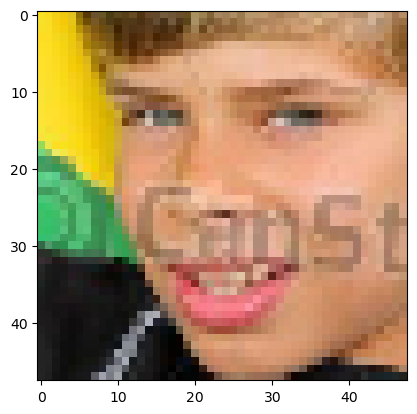

In [6]:
plt.imshow(images[45])

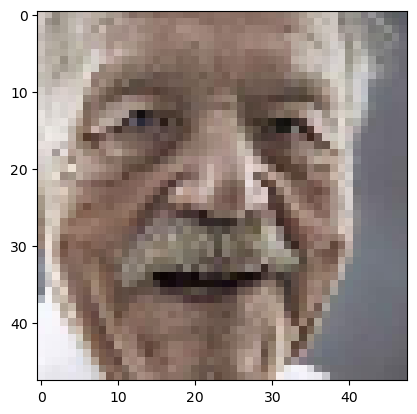

In [7]:
plt.imshow(images[0])

In [8]:
print(ages[0])

100


In [9]:
print(genders[0])

0


## Saving image array, ages array, genders array in system

In [10]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [11]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

## Finding no. of male & female samples respectively

In [12]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


## Plotting no. of male & female samples

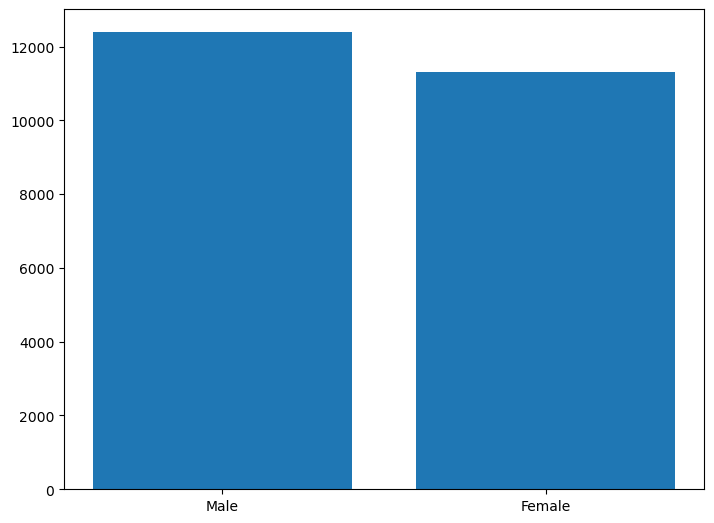

In [13]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

## Finding no. of samples in each age

In [14]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


## Convering Age counts of list

In [15]:
val=values.tolist()
cnt=counts.tolist()

## Plotting  Samples Agewise

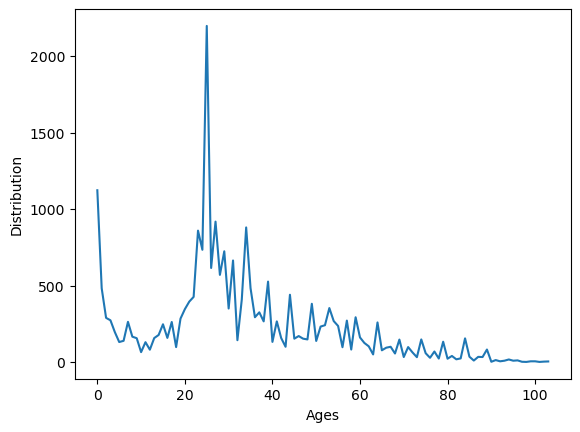

In [16]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

## Defining labels for output

In [17]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

## Creating another list of images from existing one
### for better learning

In [ ]:
images_f_2=images_f/255

In [19]:
images_f_2.shape

(23708, 48, 48, 3)

In [20]:
labels_f=np.array(labels)

## Splitting Dataset into test & train 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [23]:
Y_train[0:5]

array([[57,  0],
       [34,  1],
       [90,  1],
       [ 9,  0],
       [30,  1]])

## Splitting 'Y_test' & 'Y_train' further
### for better understanding

In [24]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [25]:
Y_train_2[0][0:5]

array([0, 1, 1, 0, 1])

In [26]:
Y_train_2[1][0:5]

array([57, 34, 90,  9, 30])

## Defining the model

In [27]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Activation, Flatten, Dense
from keras import regularizers
from keras.models import Model

def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding="same", strides=(1, 1), kernel_regularizer=regularizers.l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x


In [28]:
def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = Convolution(inputs, 32)
    maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
    conv_2 = Convolution(maxp_1, 64)
    maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
    conv_3 = Convolution(maxp_2, 128)
    maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
    conv_4 = Convolution(maxp_3, 256)
    maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)
    drop_1 = Dropout(0.1)(dense_1)
    drop_2 = Dropout(0.1)(dense_2)
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)
    model = Model(inputs=[inputs], outputs=[output_1, output_2])
    model.compile(loss=["binary_crossentropy", "mae"], optimizer="Adam", metrics=["accuracy"])
    return model


In [29]:
Model=model((48,48,3))

In [30]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint

## Initializing the model

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

fle_s = 'Age_Sex_Detection.h5'

checkpoint = ModelCheckpoint(fle_s, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')

early_stop = EarlyStopping(patience=75, monitor='val_loss', restore_best_weights=True)

callback_list = [checkpoint, early_stop]


## Running the model

In [33]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=170,callbacks=callback_list)

Epoch 1/170


278/278 [==============================] - ETA: 0s - loss: 16.7972 - sex_out_loss: 0.6775 - age_out_loss: 15.9336 - sex_out_accuracy: 0.5889 - age_out_accuracy: 0.0461
Epoch 1: val_loss improved from inf to 15.81866, saving model to Age_Sex_Detection.h5


D:\python\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


278/278 [==============================] - 69s 233ms/step - loss: 16.7972 - sex_out_loss: 0.6775 - age_out_loss: 15.9336 - sex_out_accuracy: 0.5889 - age_out_accuracy: 0.0461 - val_loss: 15.8187 - val_sex_out_loss: 0.6206 - val_age_out_loss: 15.0266 - val_sex_out_accuracy: 0.6757 - val_age_out_accuracy: 0.0510
Epoch 2/170
278/278 [==============================] - ETA: 0s - loss: 13.0991 - sex_out_loss: 0.5567 - age_out_loss: 12.3469 - sex_out_accuracy: 0.7199 - age_out_accuracy: 0.0421
Epoch 2: val_loss improved from 15.81866 to 13.08541, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 64s 230ms/step - loss: 13.0991 - sex_out_loss: 0.5567 - age_out_loss: 12.3469 - sex_out_accuracy: 0.7199 - age_out_accuracy: 0.0421 - val_loss: 13.0854 - val_sex_out_loss: 0.5133 - val_age_out_loss: 12.3450 - val_sex_out_accuracy: 0.7596 - val_age_out_accuracy: 0.0447
Epoch 3/170
278/278 [==============================] - ETA: 0s - loss: 11.1694 - sex_out_loss: 0.4929 - a

Epoch 31/170
278/278 [==============================] - ETA: 0s - loss: 6.0553 - sex_out_loss: 0.2147 - age_out_loss: 5.1351 - sex_out_accuracy: 0.9065 - age_out_accuracy: 0.0462
Epoch 31: val_loss did not improve from 7.50015
278/278 [==============================] - 63s 227ms/step - loss: 6.0553 - sex_out_loss: 0.2147 - age_out_loss: 5.1351 - sex_out_accuracy: 0.9065 - age_out_accuracy: 0.0462 - val_loss: 7.6628 - val_sex_out_loss: 0.2530 - val_age_out_loss: 6.6987 - val_sex_out_accuracy: 0.8919 - val_age_out_accuracy: 0.0510
Epoch 32/170
278/278 [==============================] - ETA: 0s - loss: 5.9879 - sex_out_loss: 0.2104 - age_out_loss: 5.0601 - sex_out_accuracy: 0.9089 - age_out_accuracy: 0.0461
Epoch 32: val_loss did not improve from 7.50015
278/278 [==============================] - 63s 227ms/step - loss: 5.9879 - sex_out_loss: 0.2104 - age_out_loss: 5.0601 - sex_out_accuracy: 0.9089 - age_out_accuracy: 0.0461 - val_loss: 8.9333 - val_sex_out_loss: 0.2536 - val_age_out_loss:

278/278 [==============================] - ETA: 0s - loss: 5.3860 - sex_out_loss: 0.1791 - age_out_loss: 4.2692 - sex_out_accuracy: 0.9212 - age_out_accuracy: 0.0460
Epoch 61: val_loss did not improve from 7.36622
278/278 [==============================] - 39s 141ms/step - loss: 5.3860 - sex_out_loss: 0.1791 - age_out_loss: 4.2692 - sex_out_accuracy: 0.9212 - age_out_accuracy: 0.0460 - val_loss: 8.0899 - val_sex_out_loss: 0.2703 - val_age_out_loss: 6.8794 - val_sex_out_accuracy: 0.8866 - val_age_out_accuracy: 0.0510
Epoch 62/170
278/278 [==============================] - ETA: 0s - loss: 5.4637 - sex_out_loss: 0.1714 - age_out_loss: 4.3501 - sex_out_accuracy: 0.9255 - age_out_accuracy: 0.0458
Epoch 62: val_loss did not improve from 7.36622
278/278 [==============================] - 41s 148ms/step - loss: 5.4637 - sex_out_loss: 0.1714 - age_out_loss: 4.3501 - sex_out_accuracy: 0.9255 - age_out_accuracy: 0.0458 - val_loss: 7.7529 - val_sex_out_loss: 0.2546 - val_age_out_loss: 6.5536 - val

278/278 [==============================] - 36s 130ms/step - loss: 5.2465 - sex_out_loss: 0.1585 - age_out_loss: 4.0891 - sex_out_accuracy: 0.9326 - age_out_accuracy: 0.0457 - val_loss: 8.1959 - val_sex_out_loss: 0.2761 - val_age_out_loss: 6.9194 - val_sex_out_accuracy: 0.8883 - val_age_out_accuracy: 0.0510
Epoch 77/170
278/278 [==============================] - ETA: 0s - loss: 5.2731 - sex_out_loss: 0.1599 - age_out_loss: 4.1113 - sex_out_accuracy: 0.9311 - age_out_accuracy: 0.0457
Epoch 77: val_loss did not improve from 7.36622
278/278 [==============================] - 38s 135ms/step - loss: 5.2731 - sex_out_loss: 0.1599 - age_out_loss: 4.1113 - sex_out_accuracy: 0.9311 - age_out_accuracy: 0.0457 - val_loss: 7.5153 - val_sex_out_loss: 0.2663 - val_age_out_loss: 6.2446 - val_sex_out_accuracy: 0.8983 - val_age_out_accuracy: 0.0510
Epoch 78/170
278/278 [==============================] - ETA: 0s - loss: 5.2193 - sex_out_loss: 0.1626 - age_out_loss: 4.0513 - sex_out_accuracy: 0.9303 - age

Epoch 92/170
278/278 [==============================] - ETA: 0s - loss: 5.1763 - sex_out_loss: 0.1541 - age_out_loss: 3.9805 - sex_out_accuracy: 0.9361 - age_out_accuracy: 0.0453
Epoch 92: val_loss did not improve from 7.36622
278/278 [==============================] - 38s 136ms/step - loss: 5.1763 - sex_out_loss: 0.1541 - age_out_loss: 3.9805 - sex_out_accuracy: 0.9361 - age_out_accuracy: 0.0453 - val_loss: 7.9584 - val_sex_out_loss: 0.2662 - val_age_out_loss: 6.6494 - val_sex_out_accuracy: 0.8961 - val_age_out_accuracy: 0.0510
Epoch 93/170
278/278 [==============================] - ETA: 0s - loss: 5.1279 - sex_out_loss: 0.1467 - age_out_loss: 3.9386 - sex_out_accuracy: 0.9357 - age_out_accuracy: 0.0458
Epoch 93: val_loss did not improve from 7.36622
278/278 [==============================] - 36s 129ms/step - loss: 5.1279 - sex_out_loss: 0.1467 - age_out_loss: 3.9386 - sex_out_accuracy: 0.9357 - age_out_accuracy: 0.0458 - val_loss: 7.8617 - val_sex_out_loss: 0.2732 - val_age_out_loss:

## Model Evaluation

In [34]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 3s 15ms/step - loss: 7.3662 - sex_out_loss: 0.2563 - age_out_loss: 6.3256 - sex_out_accuracy: 0.8917 - age_out_accuracy: 0.0510


[7.366225242614746,
 0.25633788108825684,
 6.32560396194458,
 0.8916821479797363,
 0.05095326527953148]

In [35]:
pred=Model.predict(X_test)

186/186 [==============================] - 4s 20ms/step


In [36]:
pred[1]

array([[35.0929  ],
       [26.731909],
       [ 8.592527],
       ...,
       [26.901443],
       [46.823647],
       [49.75044 ]], dtype=float32)

## Plotting Loss

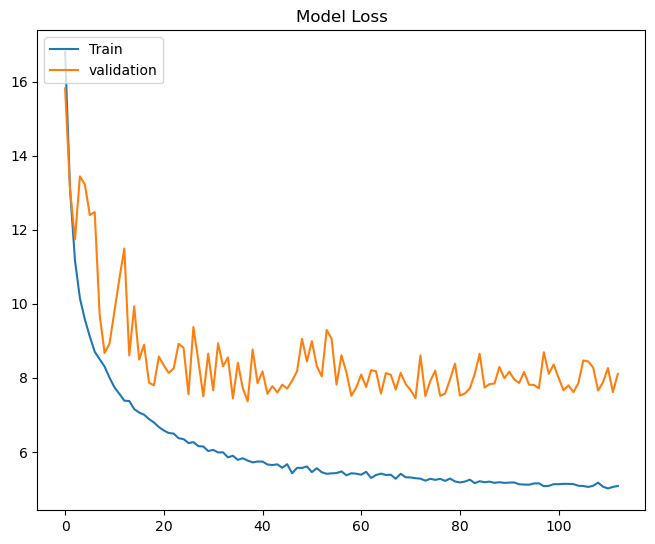

In [38]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','validation'],loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)


## Plotting Sex Accuracy

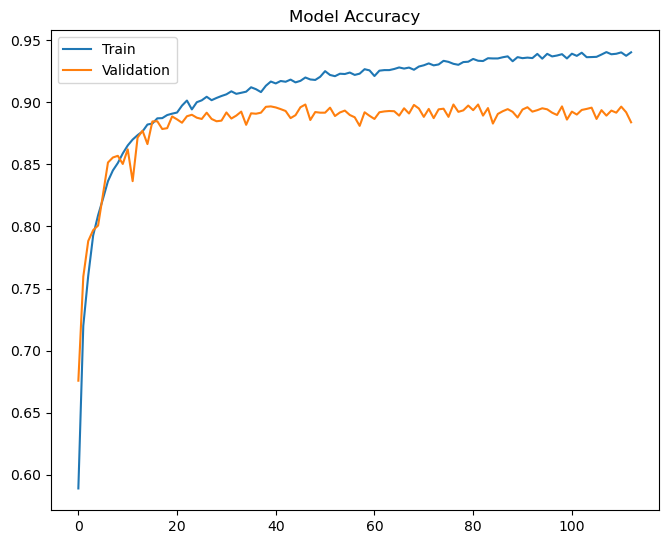

In [40]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

## Plotting gender accuracy

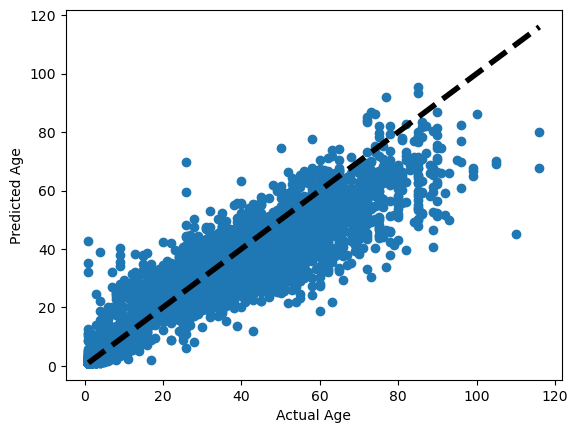

In [44]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(), Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

## Making report of model (Gender only)

In [45]:
i=0
pred_1=[]
while(i<len(pred[0])):
    pred_1.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\ndbma\AppData\Local\Temp\ipykernel_19644\463674450.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_1.append(int(np.round(pred[0][i])))


In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [48]:
report=classification_report(Y_test_2[0],pred_1)

In [49]:
print(report)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3171
           1       0.91      0.85      0.88      2756

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



## Making heatmap of model (Gender only)

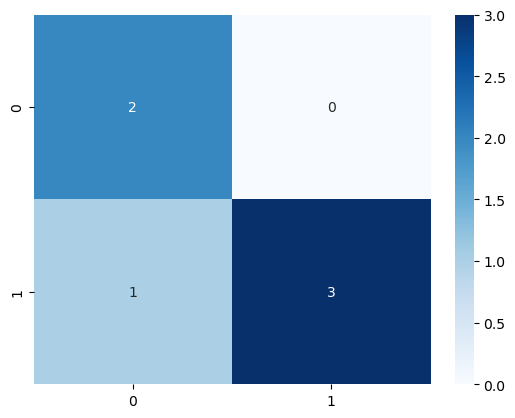

In [52]:
results=confusion_matrix(Y_test_2[0],pred_1)

# Assuming 'y_true' and 'y_pred' are your true and predicted labels
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

# Generate confusion matrix or any results you want to visualize
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a heatmap using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Show the plot
plt.show()

## Testing the image outself

In [55]:
def test_image(ind, images_f, images_f_2, Model):
    plt.imshow(images_f[ind])
    image_test = images_f_2[ind]
    pred_1 = Model.predict(np.array([image_test]))
    sex_f = ['Male', 'Female']
    age = int(np.round(pred_1[1])[0])
    sex = int(np.round(pred_1[0][0]))
    print("Predicted Age is " + str(age))
    print("Predicted Gender is " + sex_f[sex])


## Test 1

1/1 [==============================] - 0s 26ms/step
Predicted Age is 79
Predicted Gender is Female


C:\Users\ndbma\AppData\Local\Temp\ipykernel_19644\1314290849.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_1[1])[0])
C:\Users\ndbma\AppData\Local\Temp\ipykernel_19644\1314290849.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_1[0][0]))


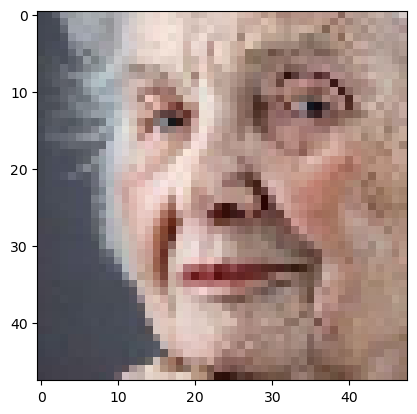

In [56]:
test_image(4,images_f,images_f_2,Model)

## Test 2

1/1 [==============================] - 0s 19ms/step
Predicted Age is 9
Predicted Gender is Male


C:\Users\ndbma\AppData\Local\Temp\ipykernel_19644\1314290849.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_1[1])[0])
C:\Users\ndbma\AppData\Local\Temp\ipykernel_19644\1314290849.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_1[0][0]))


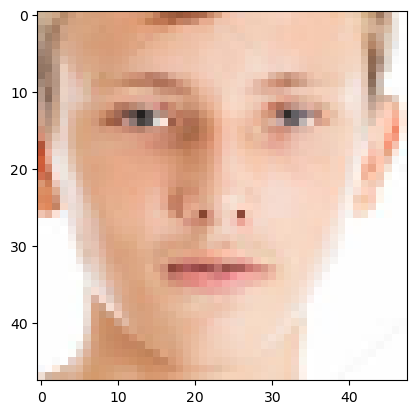

In [57]:
test_image(25,images_f,images_f_2,Model)

## Test 3

1/1 [==============================] - 0s 23ms/step
Predicted Age is 12
Predicted Gender is Female


C:\Users\ndbma\AppData\Local\Temp\ipykernel_19644\1314290849.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_1[1])[0])
C:\Users\ndbma\AppData\Local\Temp\ipykernel_19644\1314290849.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_1[0][0]))


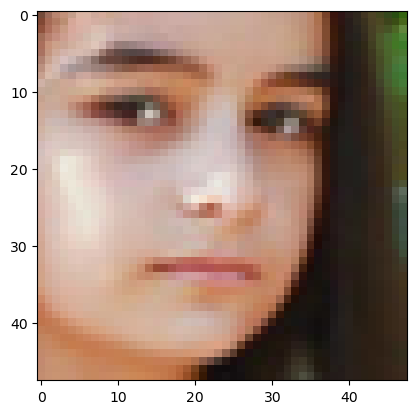

In [58]:
test_image(114,images_f,images_f_2,Model)

## Test 4 

1/1 [==============================] - 0s 17ms/step
Predicted Age is 24
Predicted Gender is Male


C:\Users\ndbma\AppData\Local\Temp\ipykernel_19644\1314290849.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_1[1])[0])
C:\Users\ndbma\AppData\Local\Temp\ipykernel_19644\1314290849.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_1[0][0]))


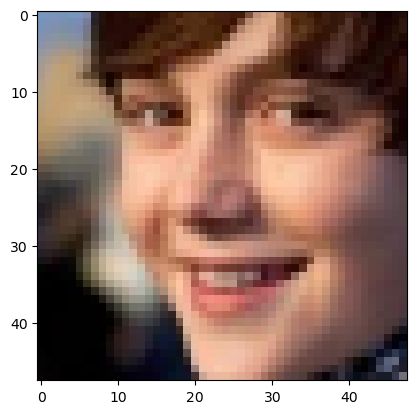

In [60]:
test_image(882,images_f,images_f_2,Model)

## Test 5

1/1 [==============================] - 0s 22ms/step
Predicted Age is 14
Predicted Gender is Male


C:\Users\ndbma\AppData\Local\Temp\ipykernel_19644\1314290849.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_1[1])[0])
C:\Users\ndbma\AppData\Local\Temp\ipykernel_19644\1314290849.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_1[0][0]))


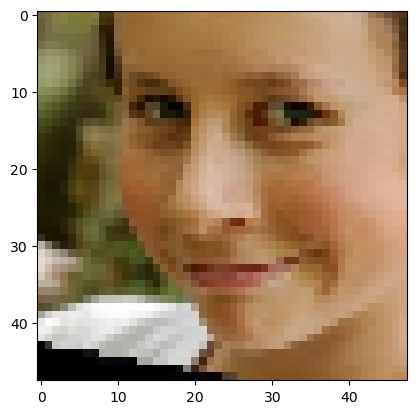

In [61]:
test_image(652,images_f,images_f_2,Model)